# 1. Estimate *p-d-q* for HOSE stock ARIMA model

In [1]:
import pandas as pd
import numpy as np

hose_df_2022 = pd.read_csv('./data/hose_df_2022.csv')
hose_df_2022.info()
hose_df_2022.sort_values(by=['ticker', 'date'], inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7968 entries, 0 to 7967
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    7968 non-null   object 
 1   ticker  7968 non-null   object 
 2   open    7968 non-null   float64
 3   high    7968 non-null   float64
 4   low     7968 non-null   float64
 5   close   7968 non-null   float64
 6   volume  7968 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 435.9+ KB
           date ticker   open   high    low  close    volume
248  2022-01-04    ACB  34.80  34.80  34.25  34.40   5403400
247  2022-01-05    ACB  34.35  34.35  33.65  33.70   6839700
246  2022-01-06    ACB  33.50  34.00  33.10  33.75   7482700
245  2022-01-07    ACB  33.90  33.95  33.30  33.30   9895200
244  2022-01-10    ACB  33.00  33.40  32.95  33.00   9460100
243  2022-01-11    ACB  33.00  33.05  32.70  32.75   8011500
242  2022-01-12    ACB  32.70  33.55  32.55  33.10   9146271
241  2022

In [3]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Set up an empty list to store the results
results_list = []

# Define a function to determine the differencing order 'd'
def determine_d(series, max_d=3):
    for d in range(max_d + 1):
        diff_series = series.diff(d).dropna() if d > 0 else series
        adf_result = adfuller(diff_series)
        if adf_result[1] < 0.05:  # Significance level of 0.05
            return d
    return max_d

# Get the unique tickers
tickers = hose_df_2022['ticker'].unique()

# Loop through each ticker
for ticker in tickers:
    # Extract the 'close' price series for the current ticker
    ticker_data = hose_df_2022[hose_df_2022['ticker'] == ticker]['close']
    
    # Determine the differencing order 'd'
    d = determine_d(ticker_data)
    
    # Append the result to the list
    results_list.append({'ticker': ticker, 'd': d})

# Create a DataFrame from the list of dictionaries
results = pd.DataFrame(results_list)

# Display the results
print(results)

       ticker  d
0         ACB  1
1         BCM  1
2         BID  1
3         BVH  1
4         CTG  1
5         FPT  1
6         GAS  0
7         GVR  1
8         HDB  1
9         HPG  1
10        MBB  1
11        MSN  1
12        MWG  1
13        NVL  1
14        PDR  1
15        PLX  1
16        POW  1
17        SAB  1
18        SSI  1
19        STB  1
20        TCB  1
21        TPB  1
22        VCB  1
23        VHM  1
24        VIB  1
25        VIC  1
26        VJC  1
27  VN30INDEX  1
28    VNINDEX  1
29        VNM  0
30        VPB  1
31        VRE  1


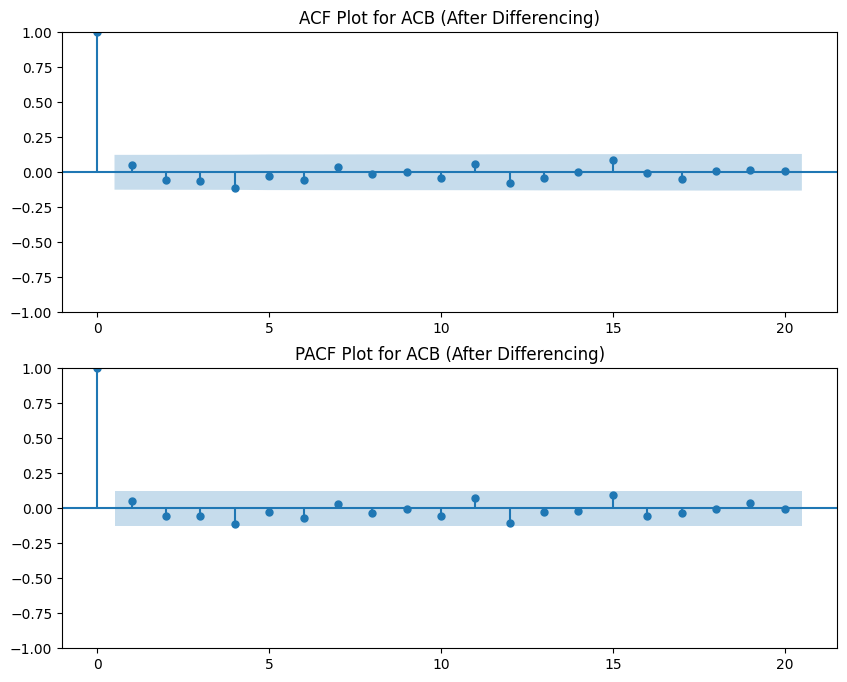

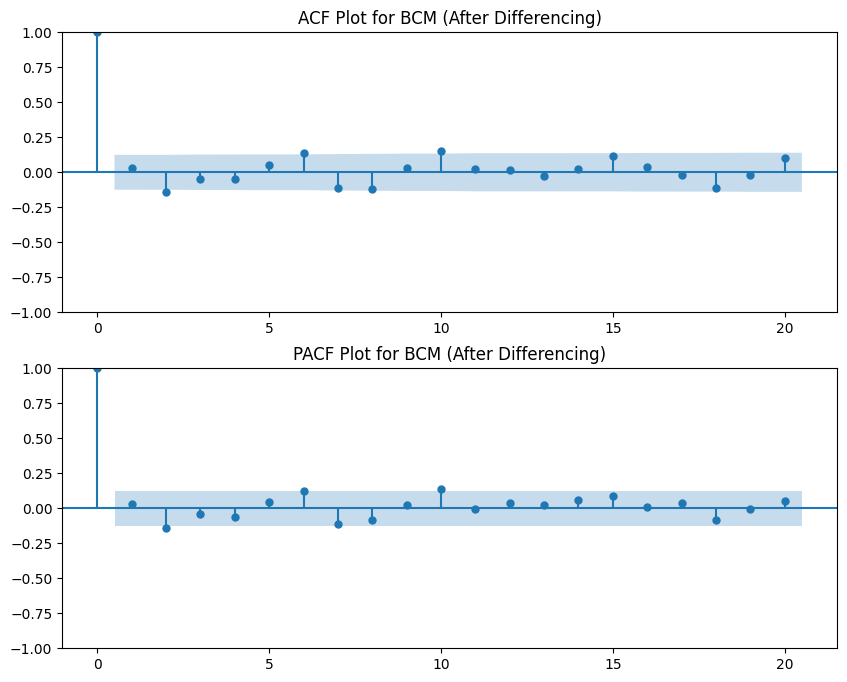

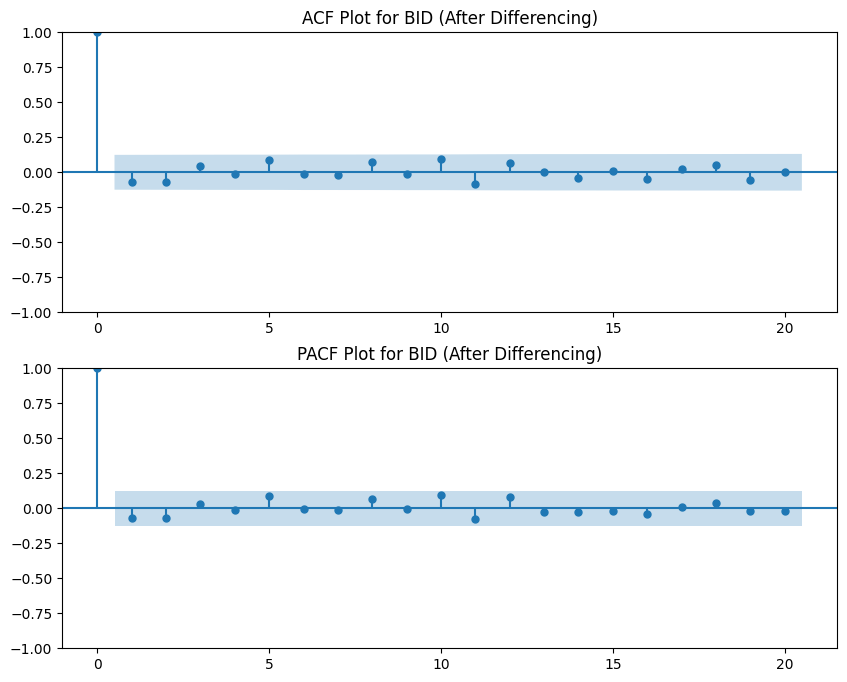

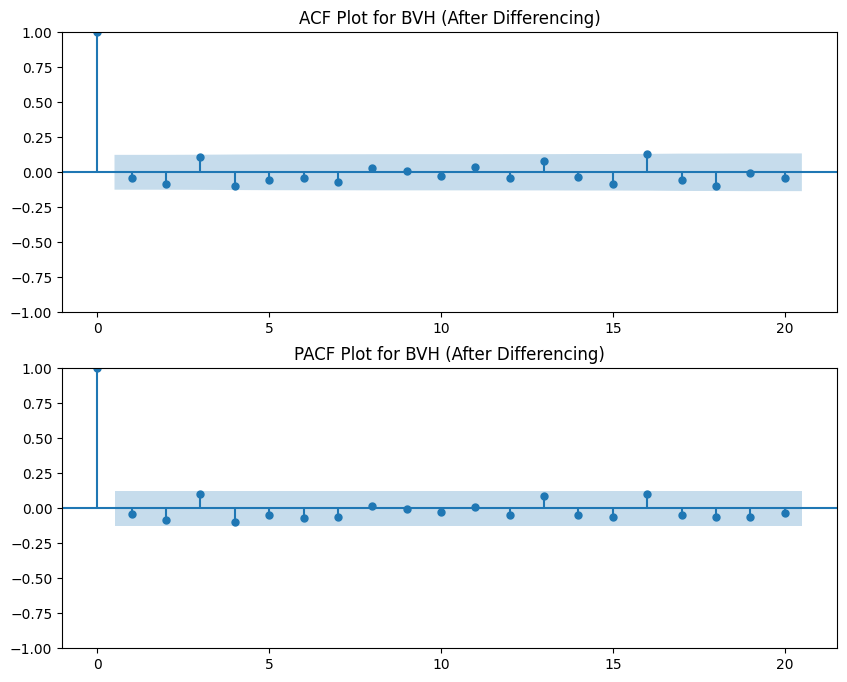

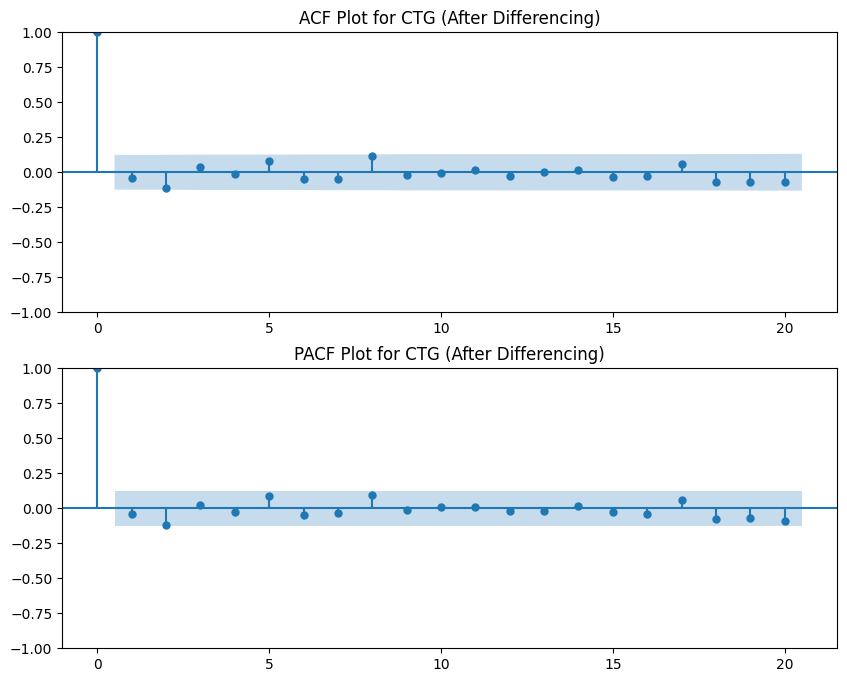

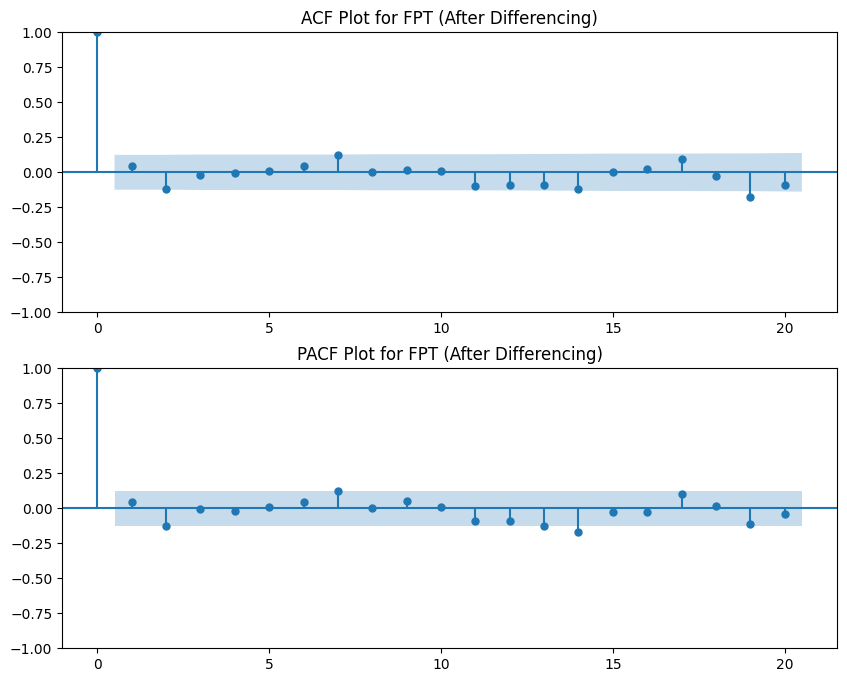

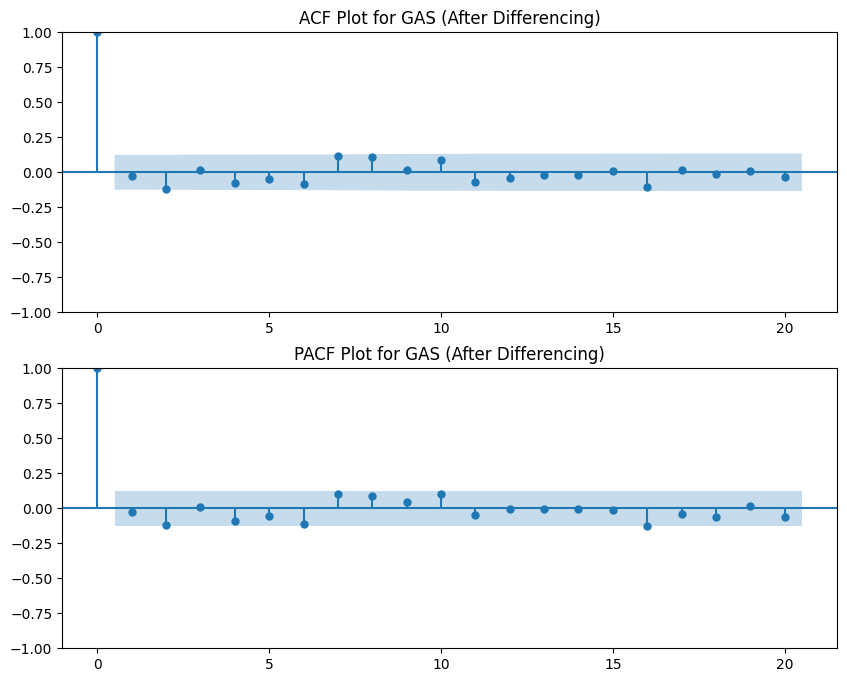

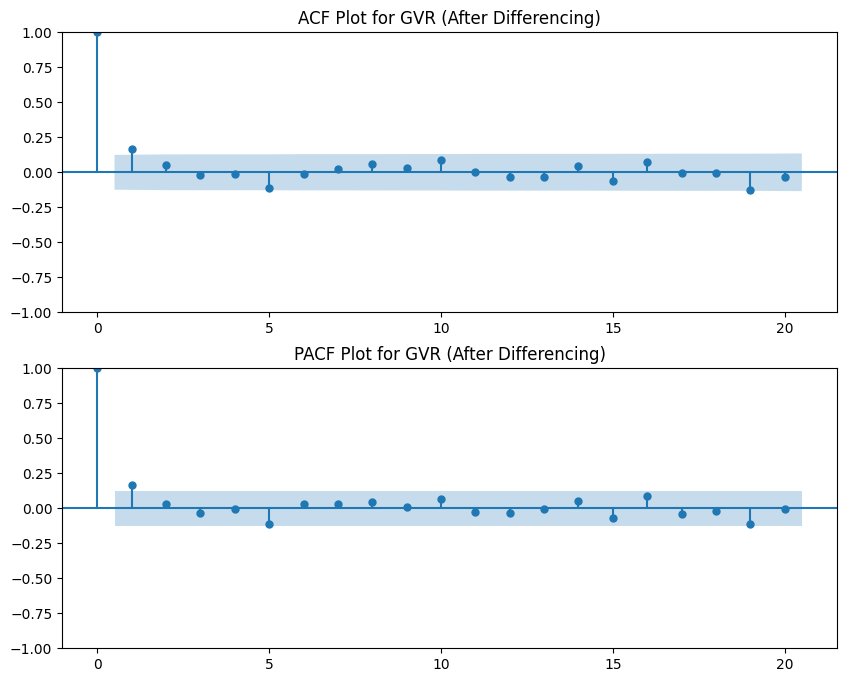

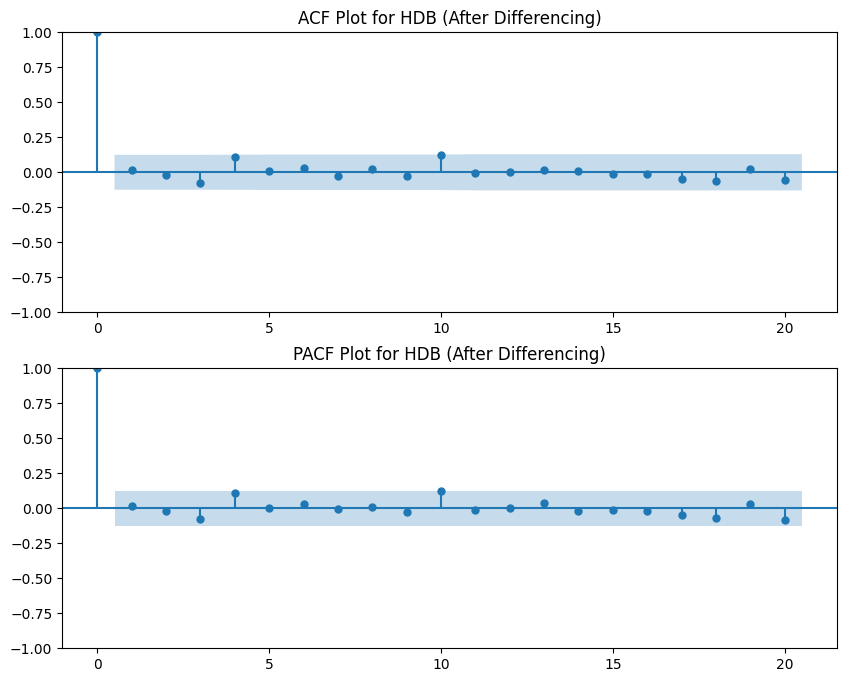

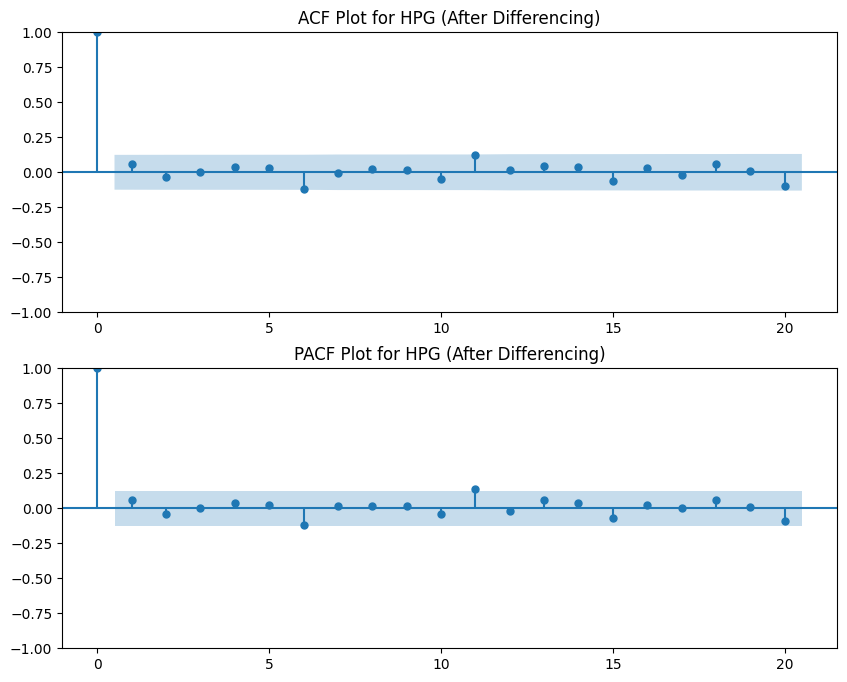

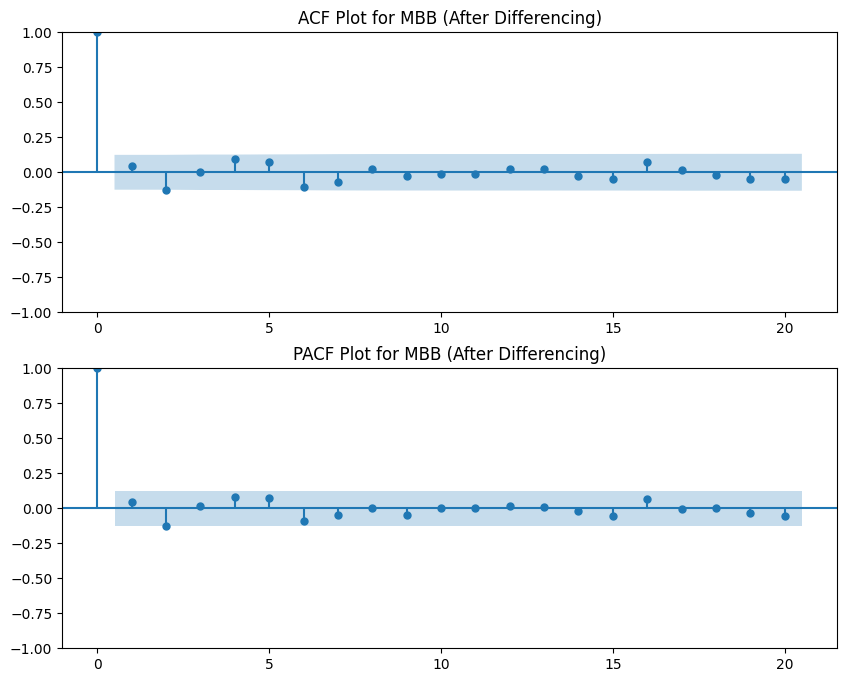

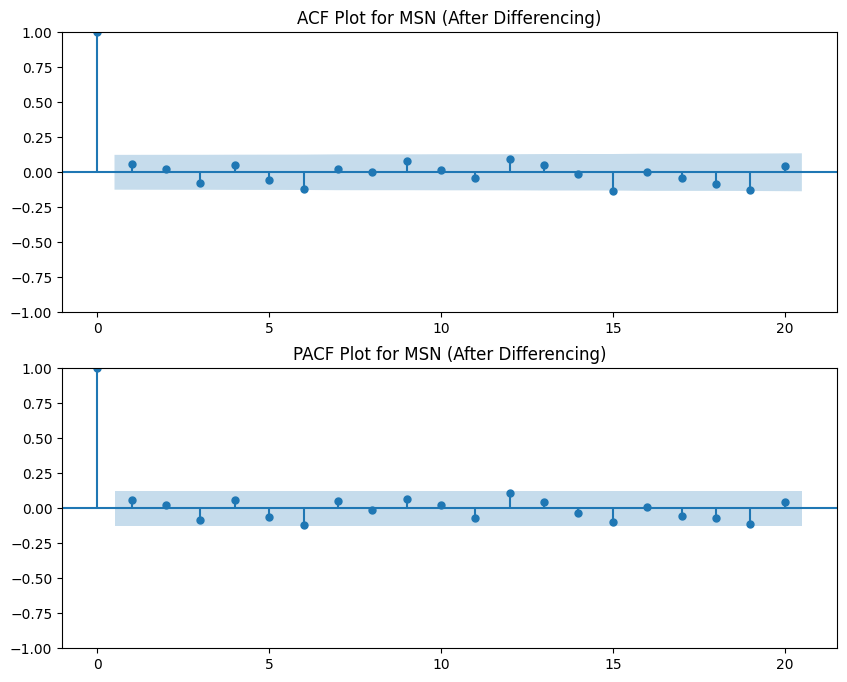

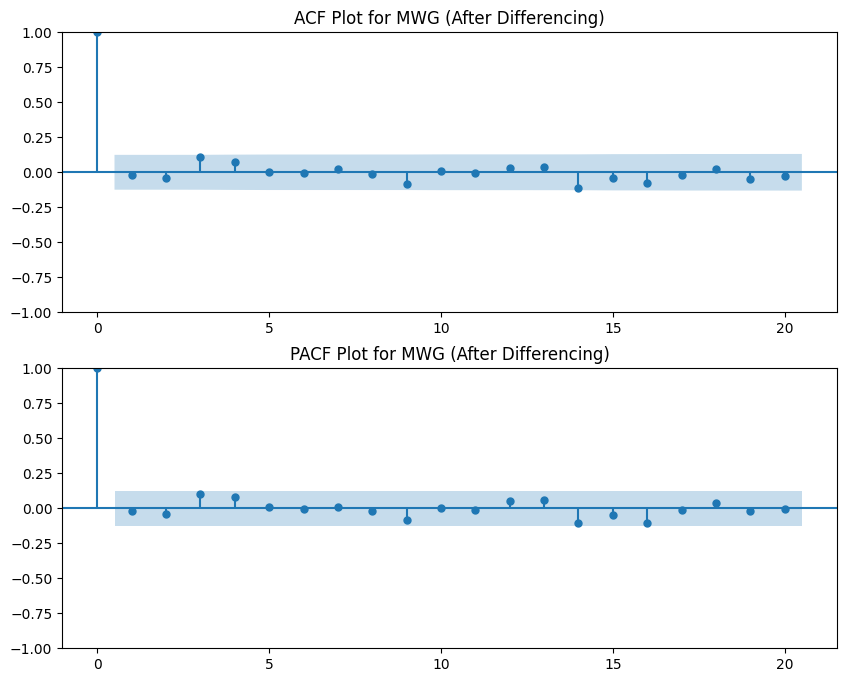

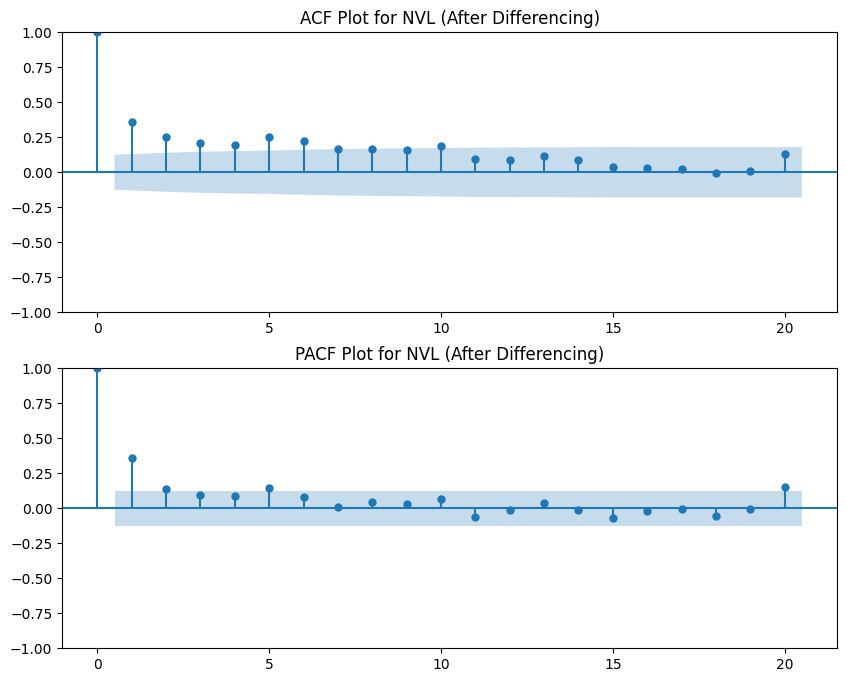

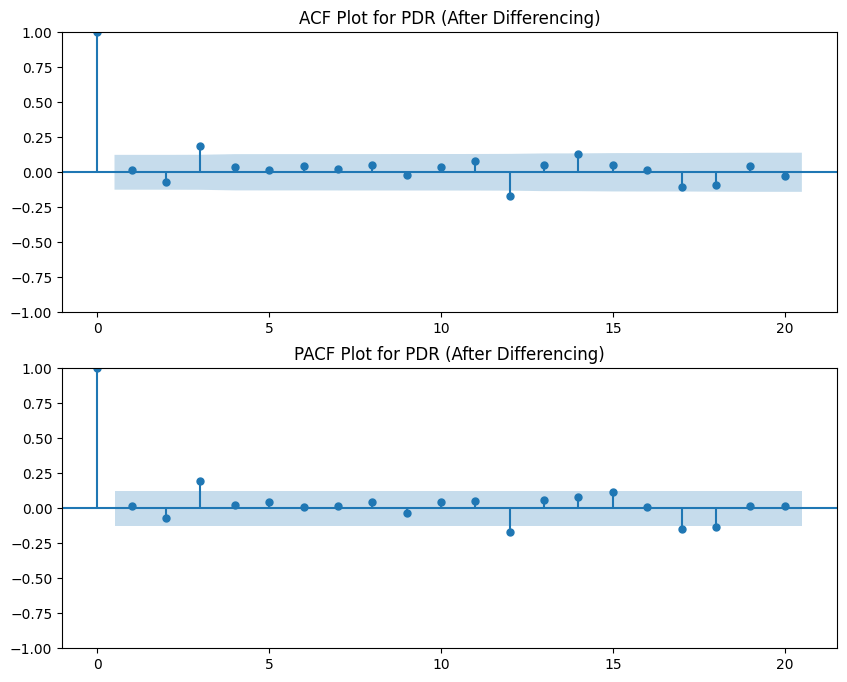

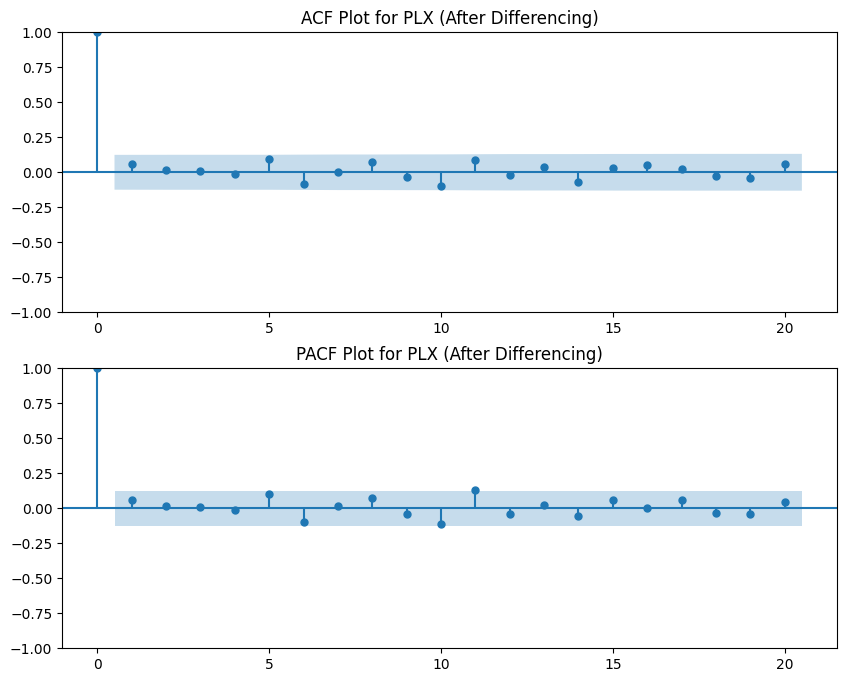

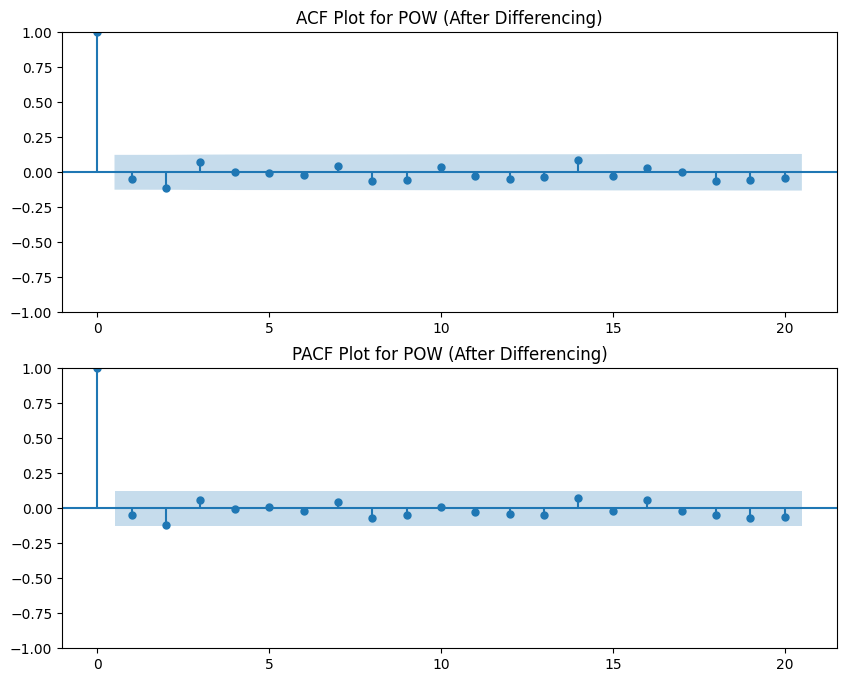

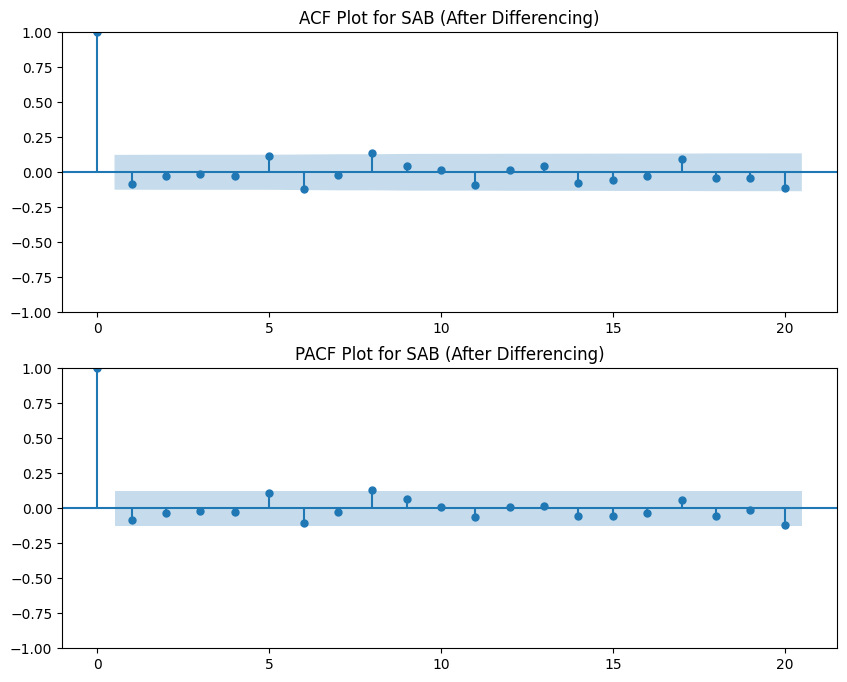

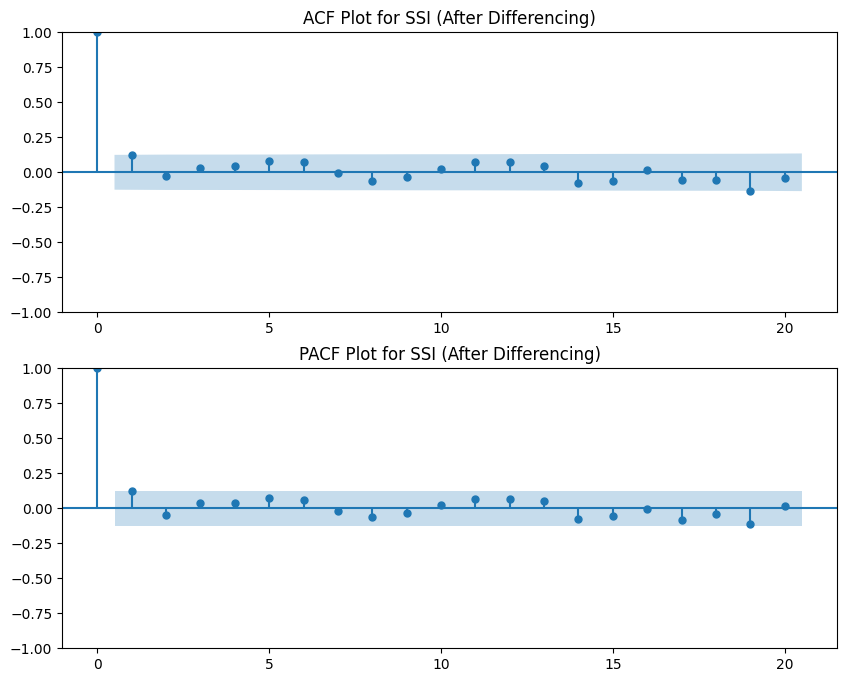

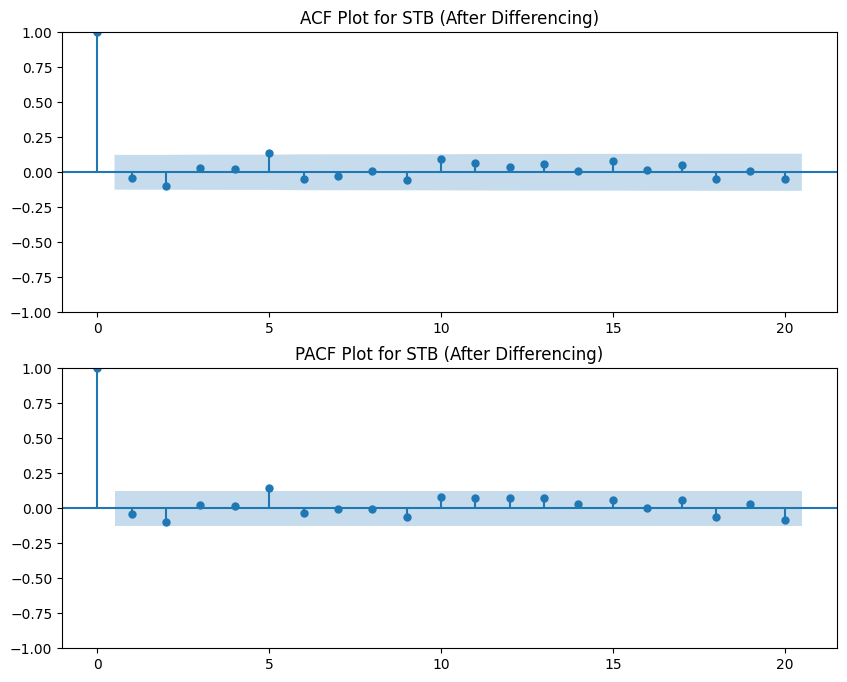

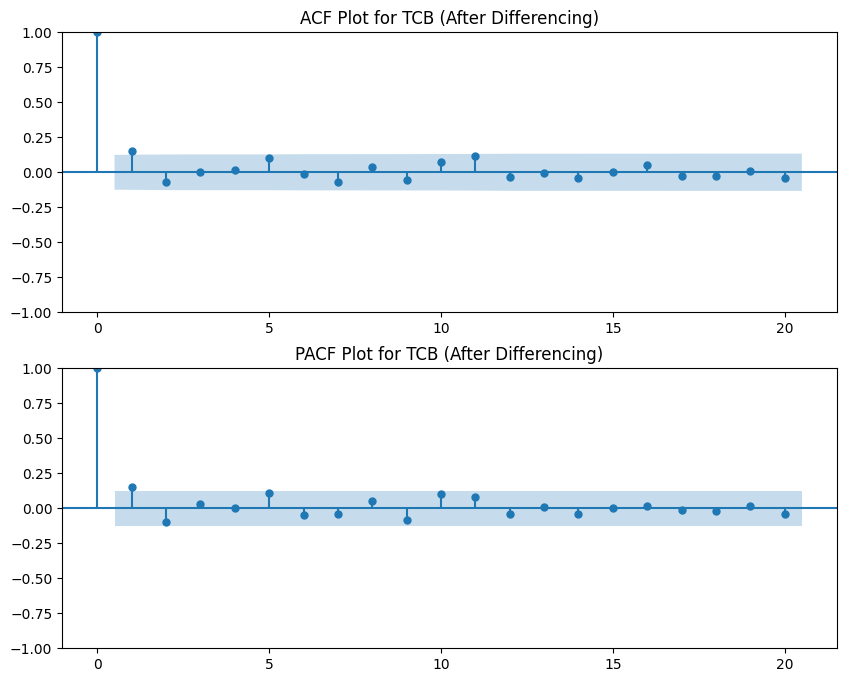

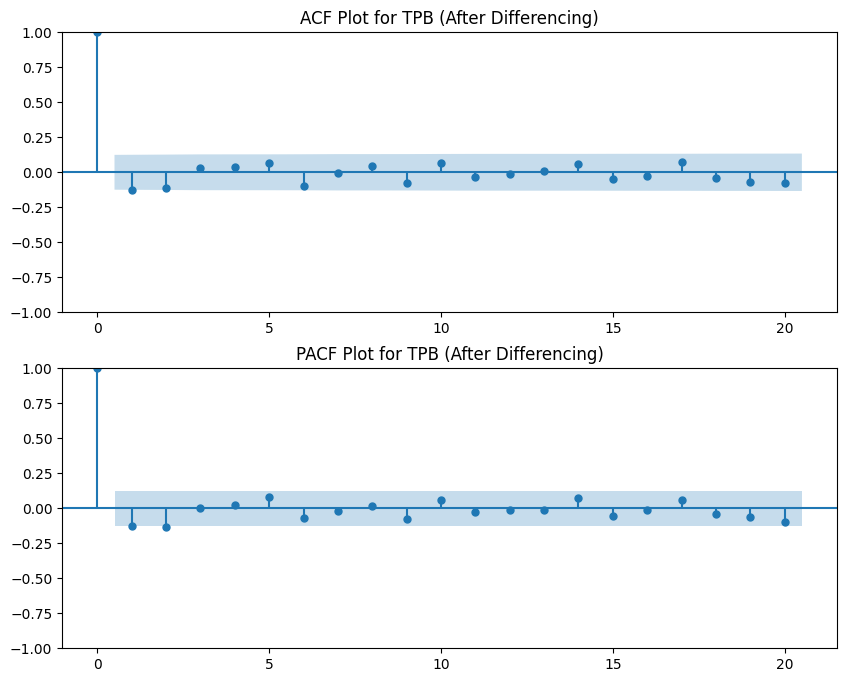

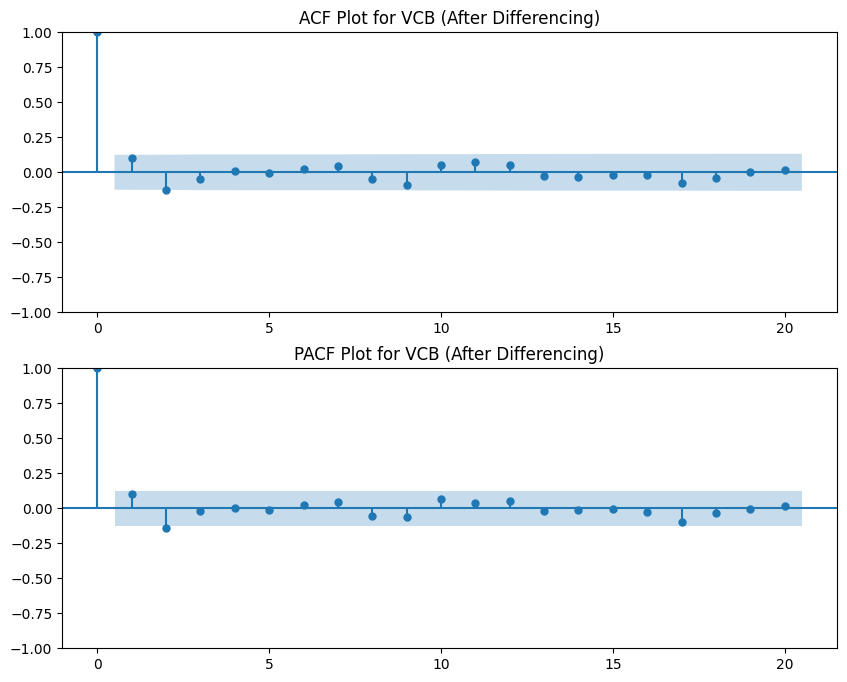

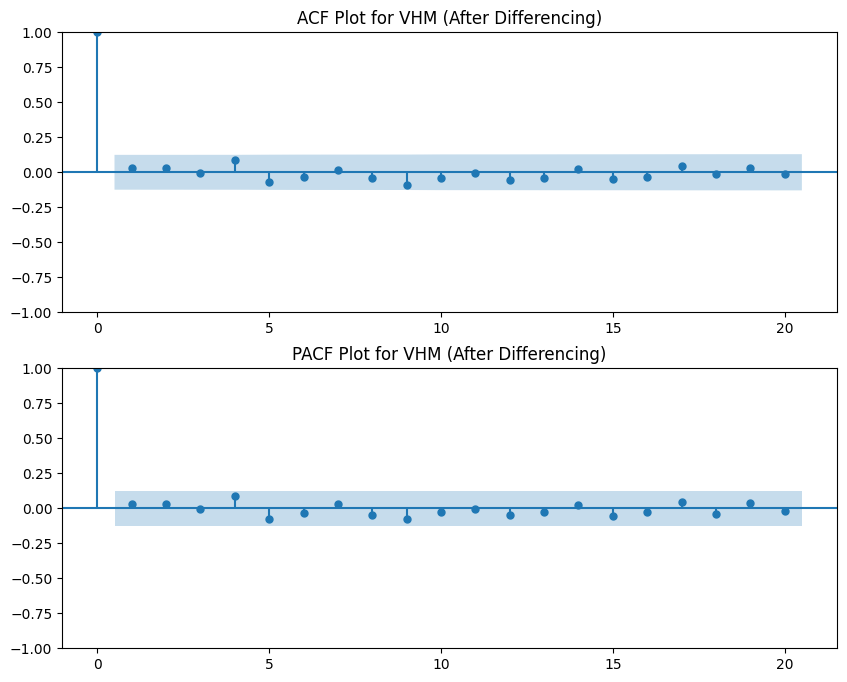

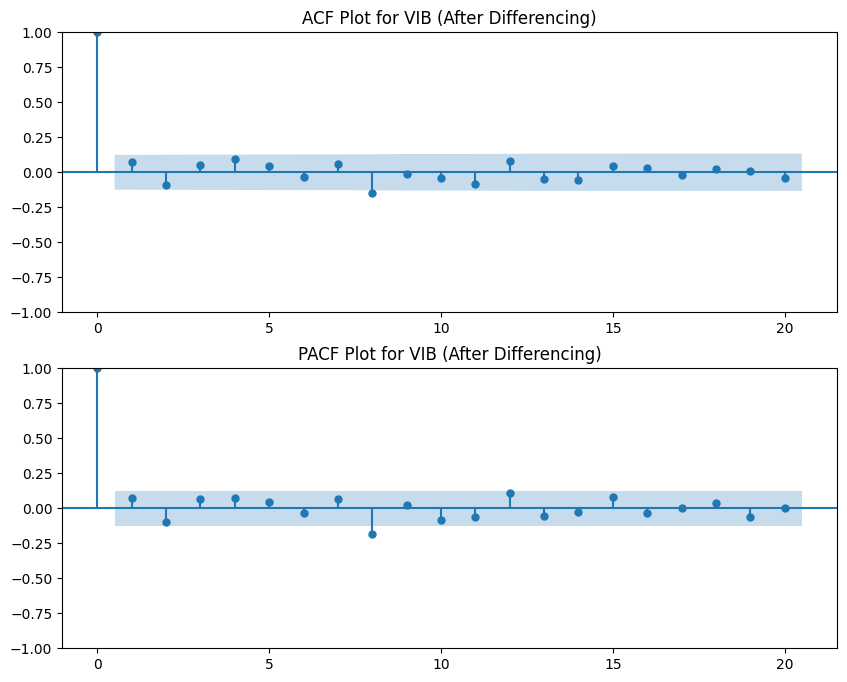

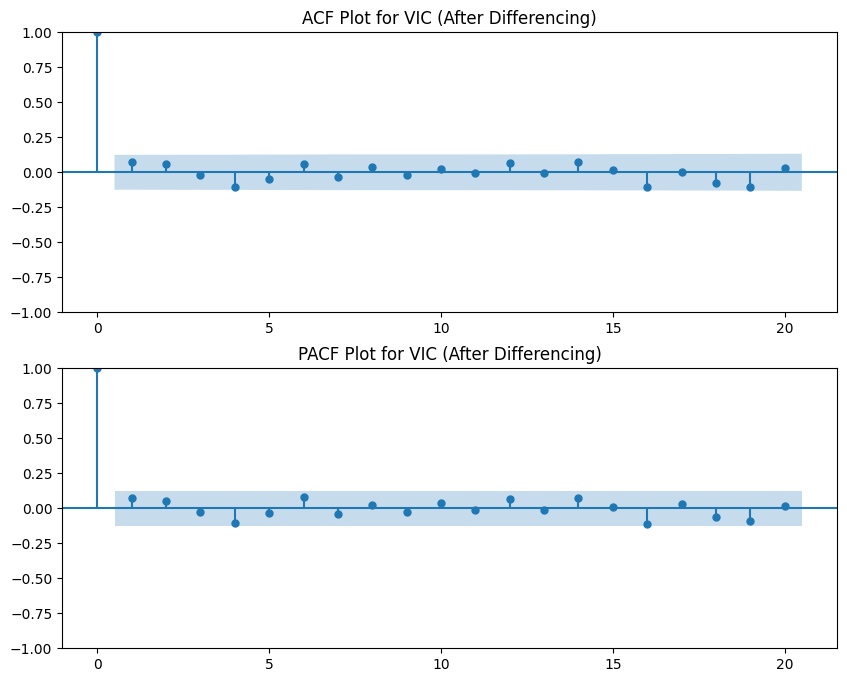

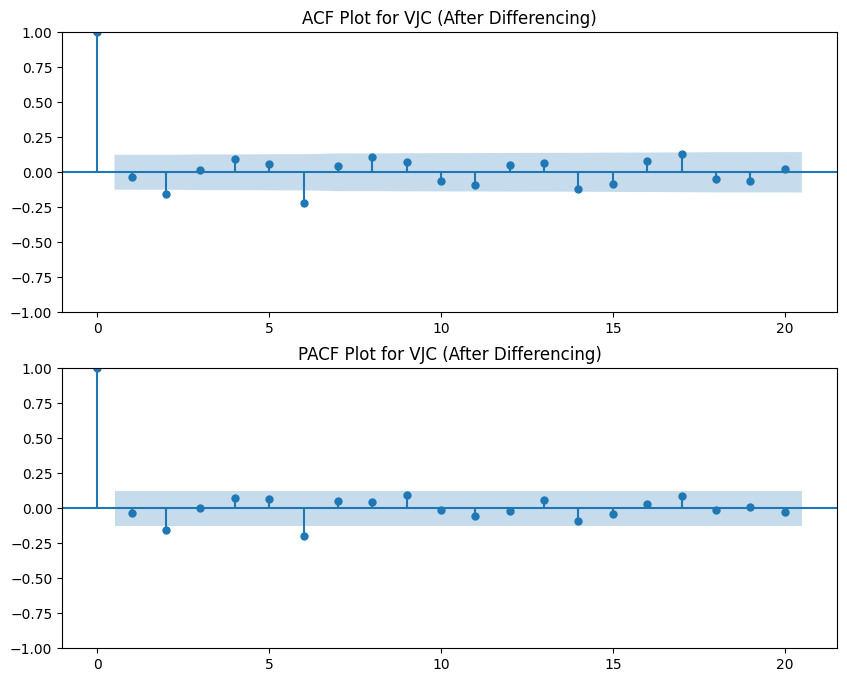

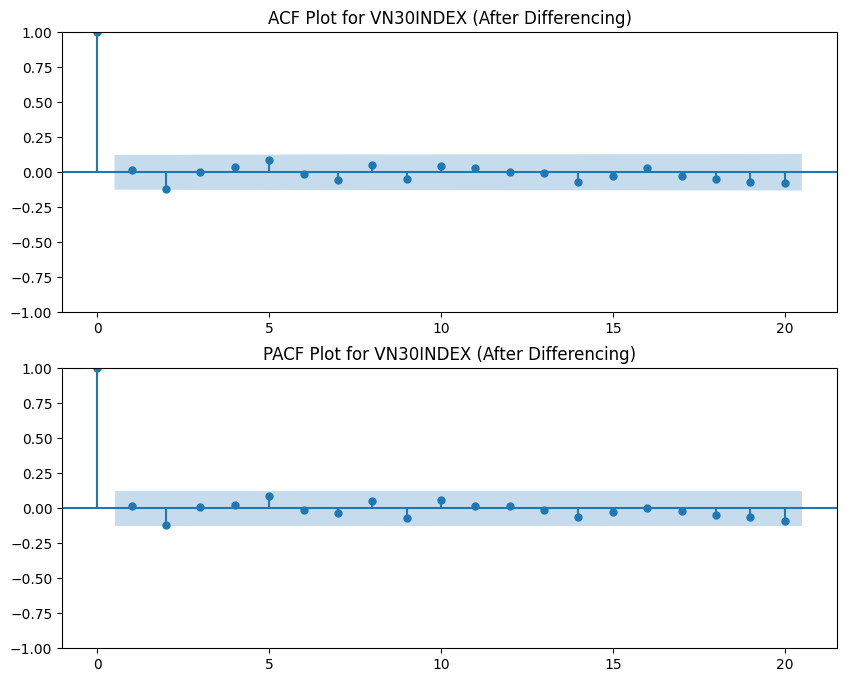

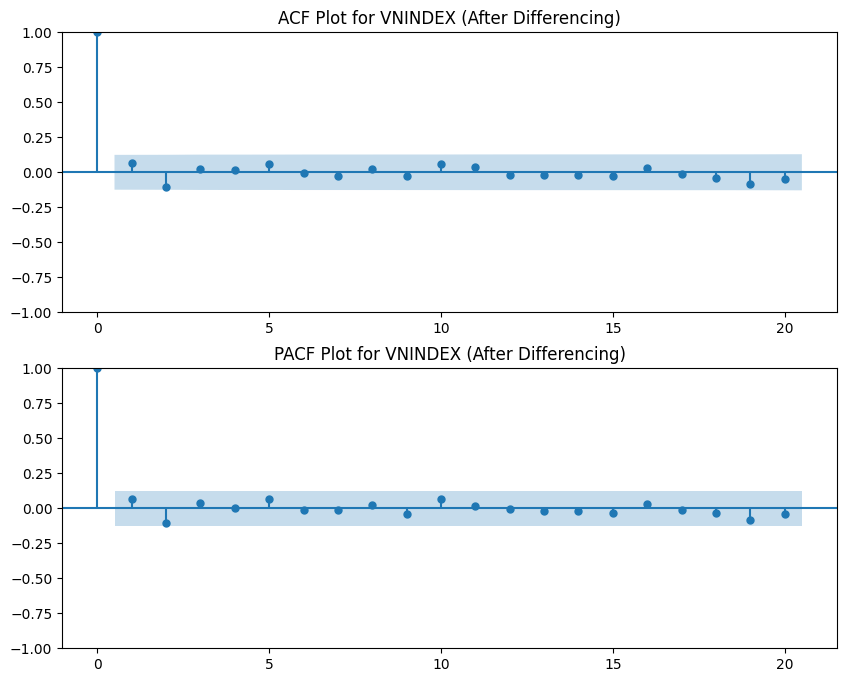

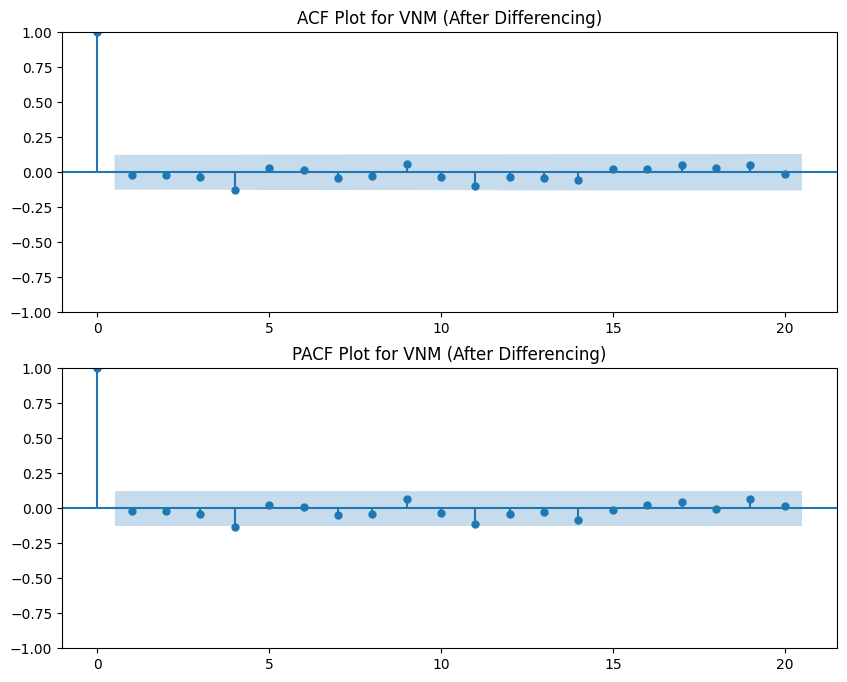

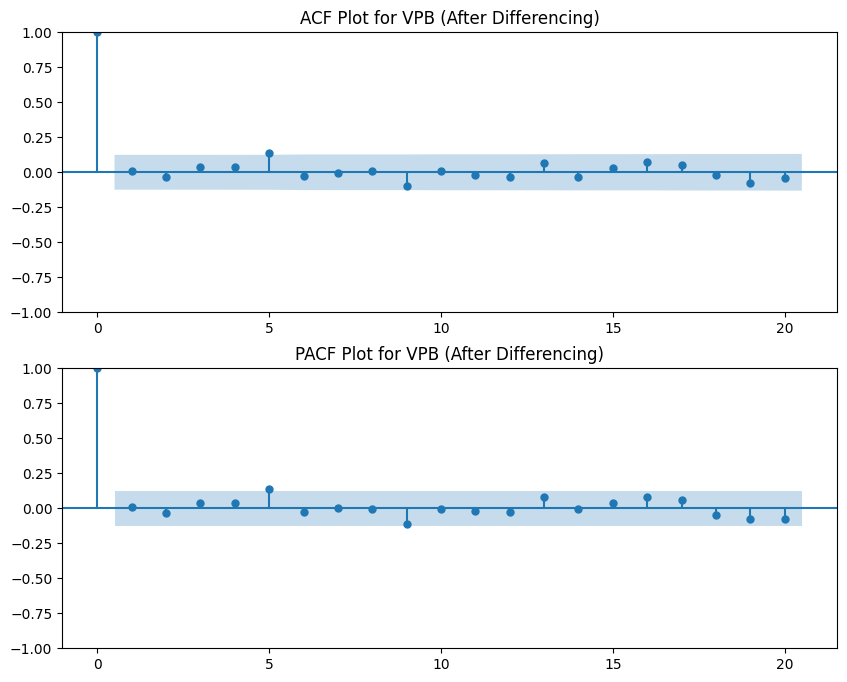

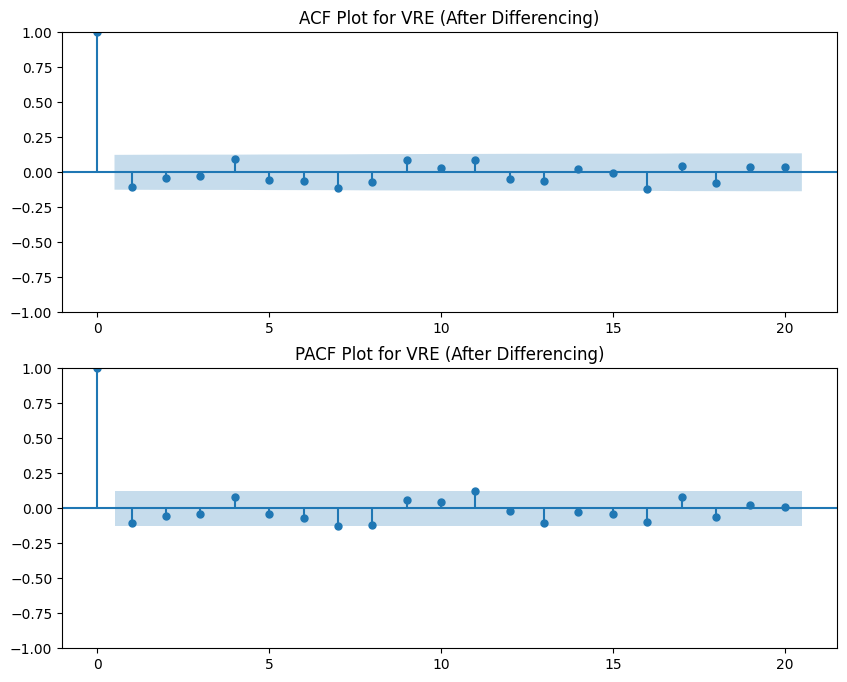

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming hose_df_2022 is already loaded

# Get the unique tickers
tickers = hose_df_2022['ticker'].unique()

# Loop through each ticker
for ticker in tickers:
    # Extract the 'close' price series for the current ticker
    ticker_data = hose_df_2022[hose_df_2022['ticker'] == ticker]['close']
    
    # Difference the time series
    differenced_data = ticker_data.diff().dropna()
    
    # Plot ACF and PACF for the differenced series
    fig, ax = plt.subplots(2, 1, figsize=(10, 8))
    plot_acf(differenced_data, ax=ax[0], lags=20, title=f'ACF Plot for {ticker} (After Differencing)')
    plot_pacf(differenced_data, ax=ax[1], lags=20, title=f'PACF Plot for {ticker} (After Differencing)')
    plt.show()

# 2. Estimate *p-d-q* for HOSE stock ARIMA model

In [10]:
import pandas as pd
import numpy as np

dse_df_2022 = pd.read_csv('./data/dse_df_2022.csv')
dse_df_2022.info()
dse_df_2022.sort_values(by=['ticker', 'date'], inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7695 entries, 0 to 7694
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    7695 non-null   object 
 1   ticker  7695 non-null   object 
 2   open    7695 non-null   float64
 3   high    7695 non-null   float64
 4   low     7695 non-null   float64
 5   close   7695 non-null   float64
 6   volume  7695 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 420.9+ KB


In [11]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Set up an empty list to store the results
dse_arima_d = []


# Get the unique tickers
tickers = dse_df_2022['ticker'].unique()

# Loop through each ticker
for ticker in tickers:
    # Extract the 'close' price series for the current ticker
    ticker_data = dse_df_2022[dse_df_2022['ticker'] == ticker]['close']
    
    # Determine the differencing order 'd'
    d = determine_d(ticker_data)
    
    # Append the result to the list
    dse_arima_d.append({'ticker': ticker, 'd': d})

# Create a DataFrame from the list of dictionaries
dse_arima_d = pd.DataFrame(dse_arima_d)

# Display the results
print(dse_arima_d)

        ticker  d
0       00DS30  1
1       00DSEX  1
2        BATBC  1
3    BBSCABLES  1
4   BEACONPHAR  1
5      BEXIMCO  1
6     BRACBANK  1
7          BSC  1
8        BSCCL  0
9      BSRMLTD  1
10    BXPHARMA  1
11    CITYBANK  1
12   DELTALIFE  0
13     FORTUNE  1
14          GP  1
15    GPHISPAT  1
16        IDLC  1
17        IFIC  1
18  ISLAMIBANK  0
19        LHBL  1
20  MPETROLEUM  0
21     OLYMPIC  1
22  ORIONPHARM  1
23   POWERGRID  1
24      RENATA  1
25        ROBI  1
26    SEAPEARL  1
27  SOUTHEASTB  1
28  SQURPHARMA  1
29    TITASGAS  0
30   UNIQUEHRL  0
31      UPGDCL  1


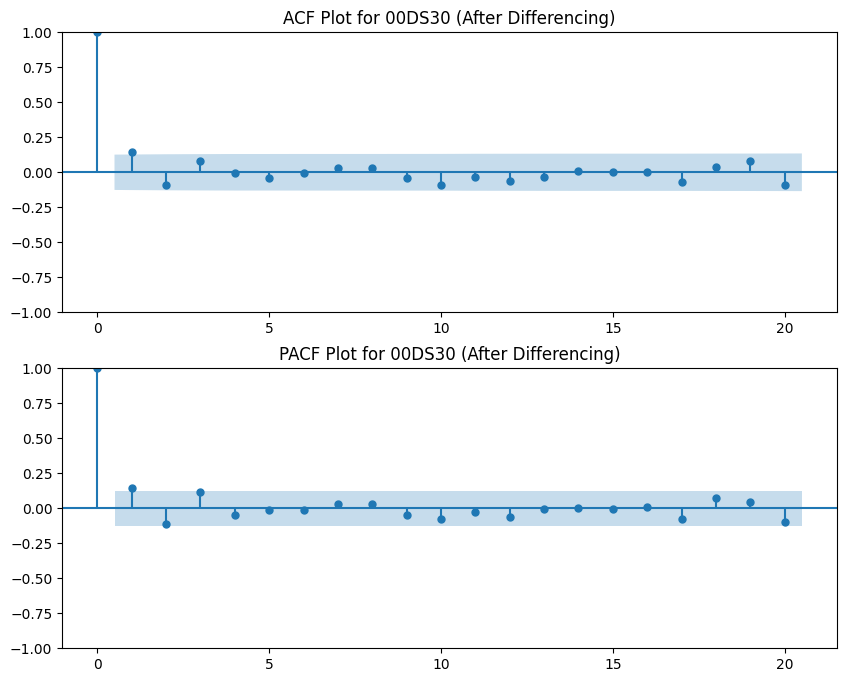

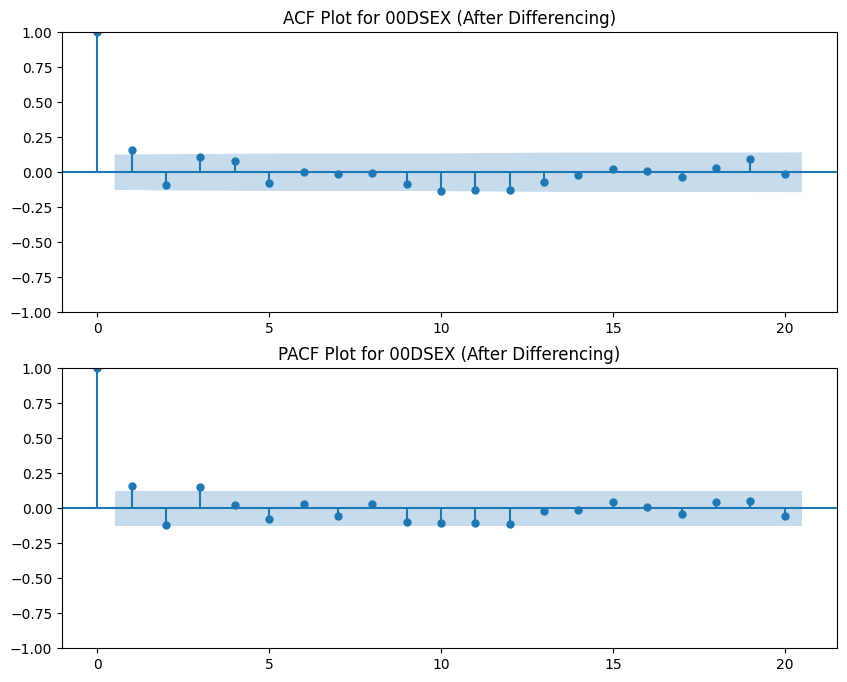

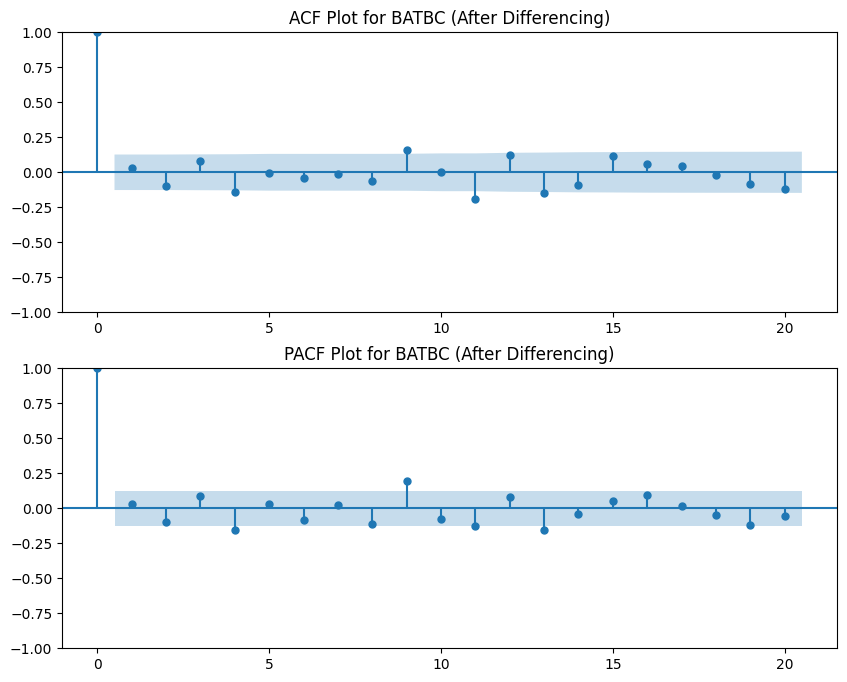

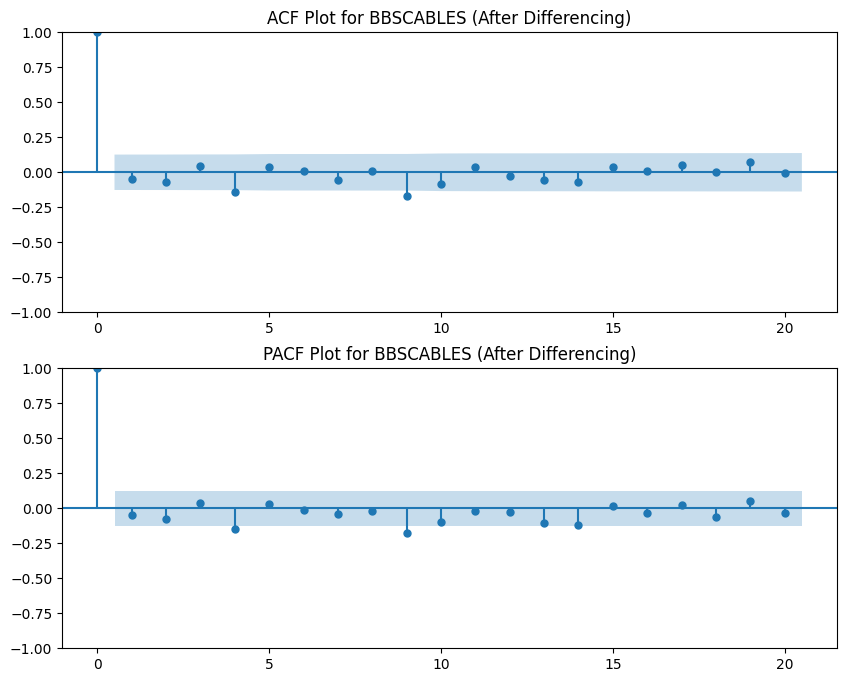

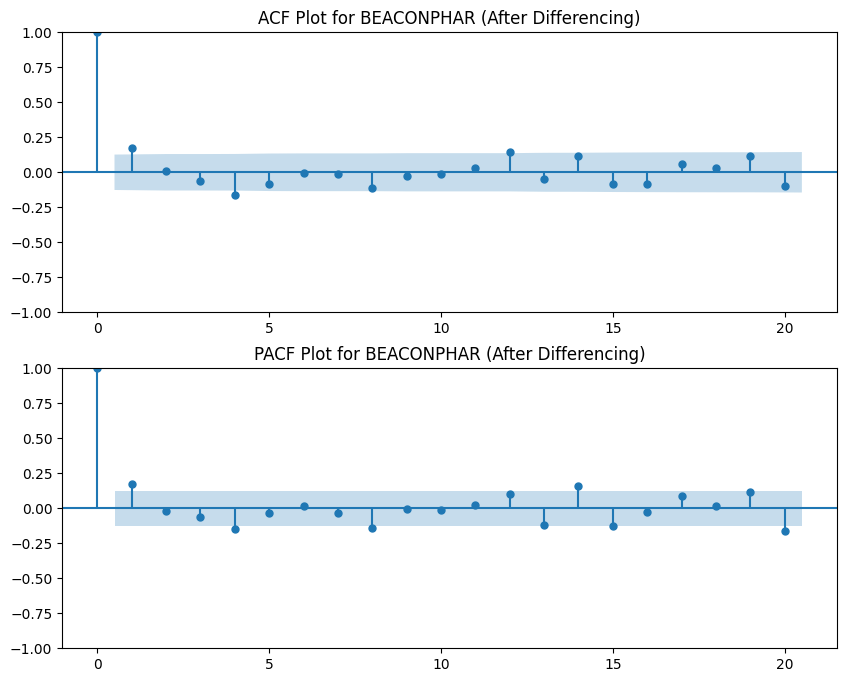

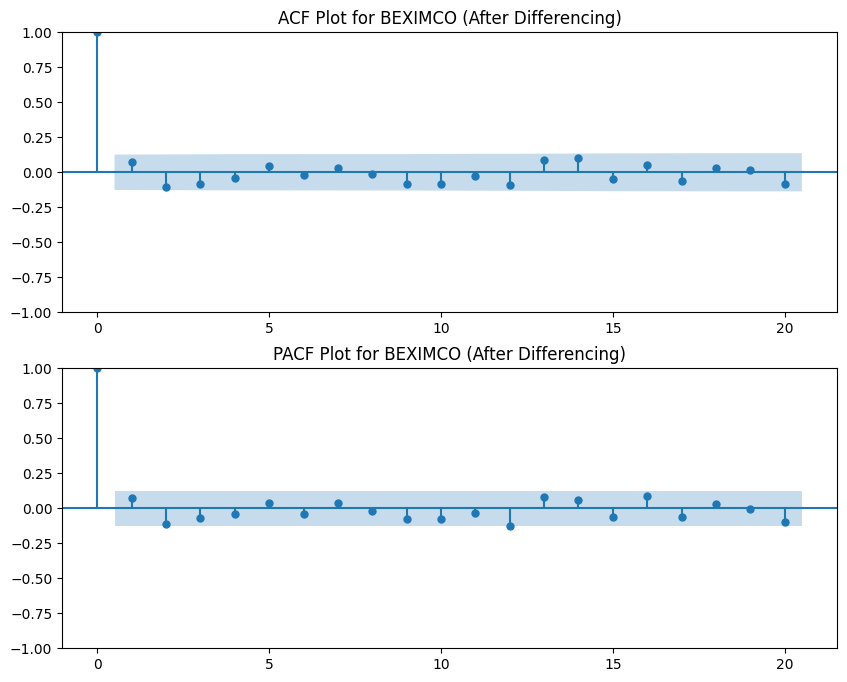

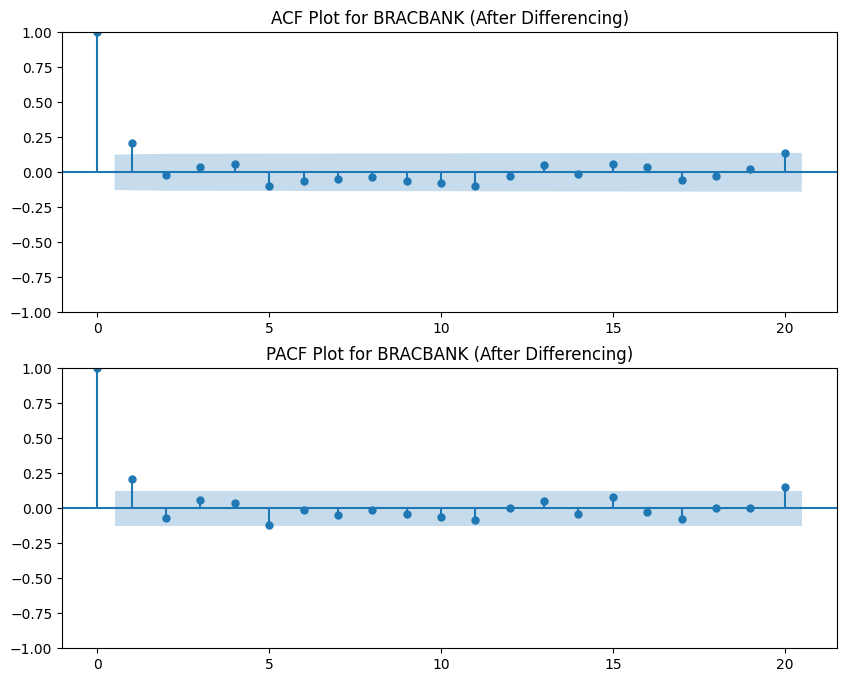

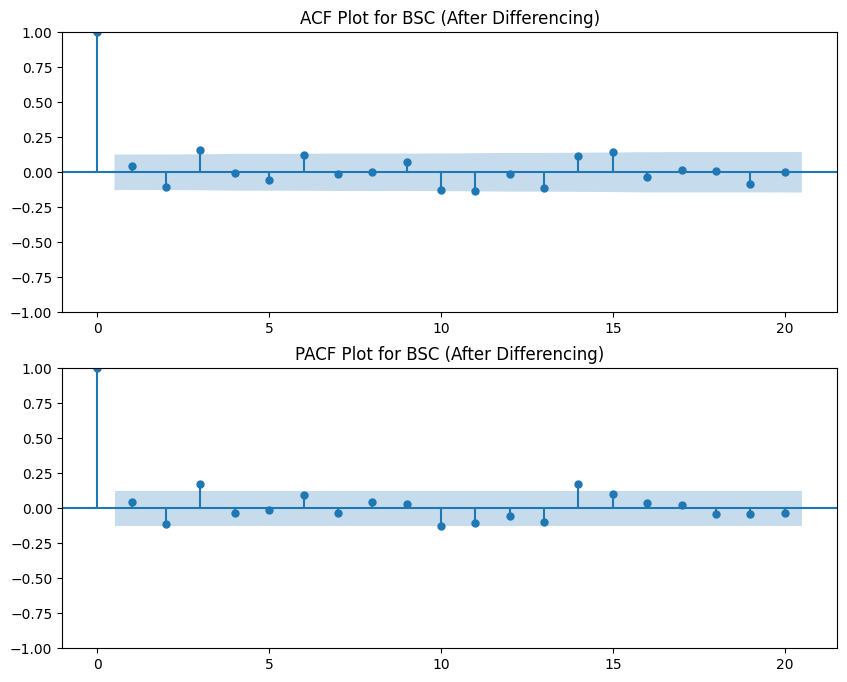

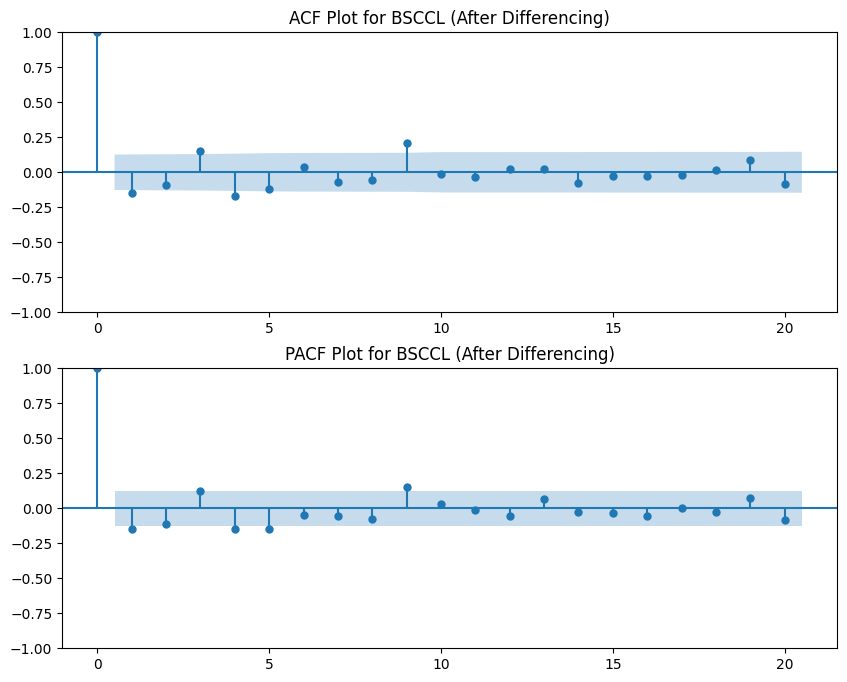

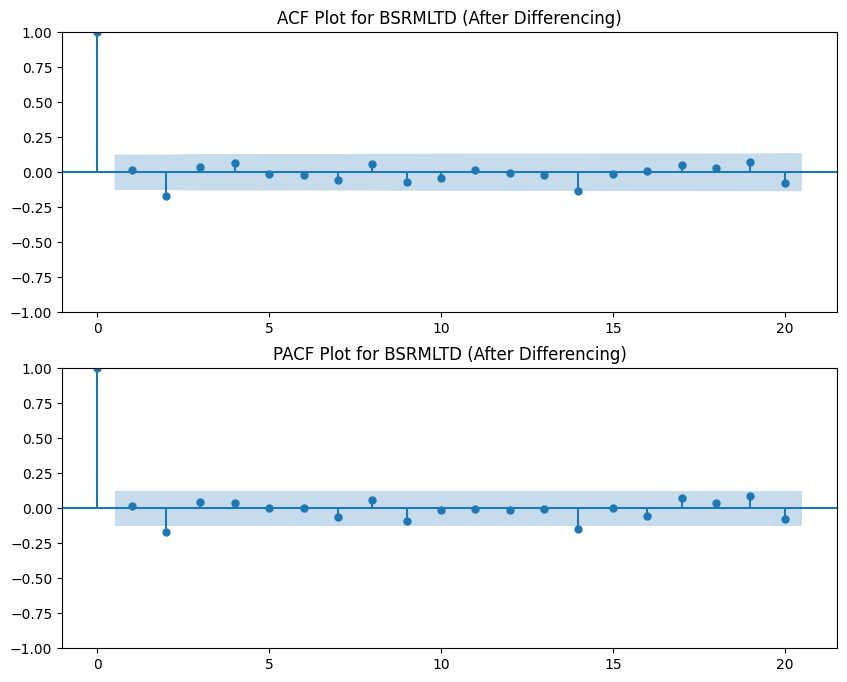

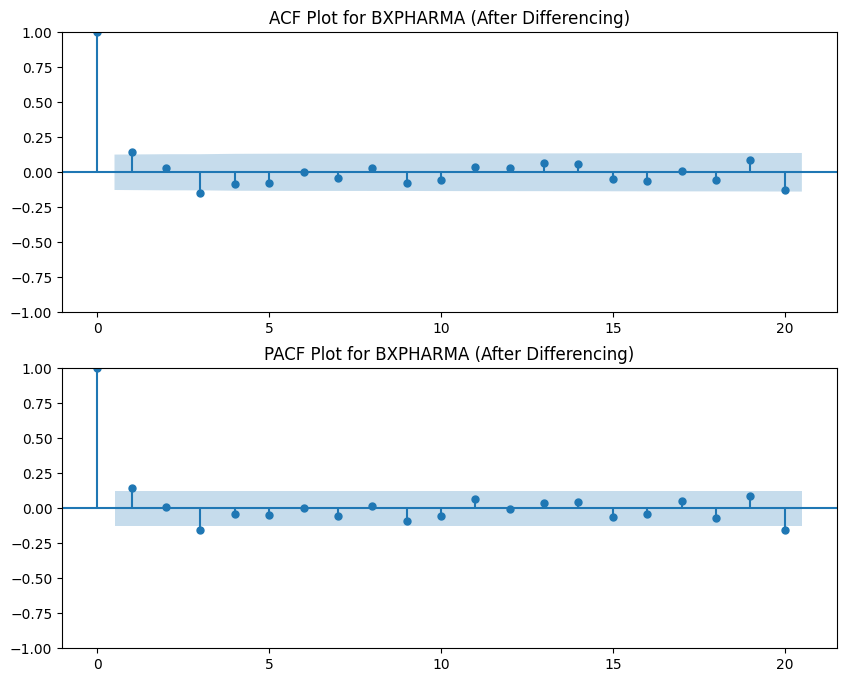

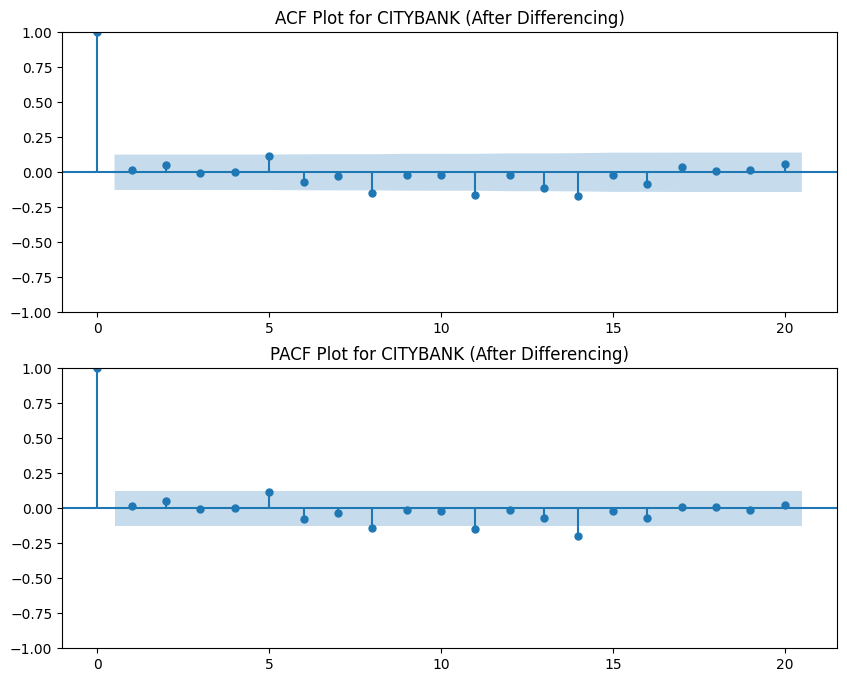

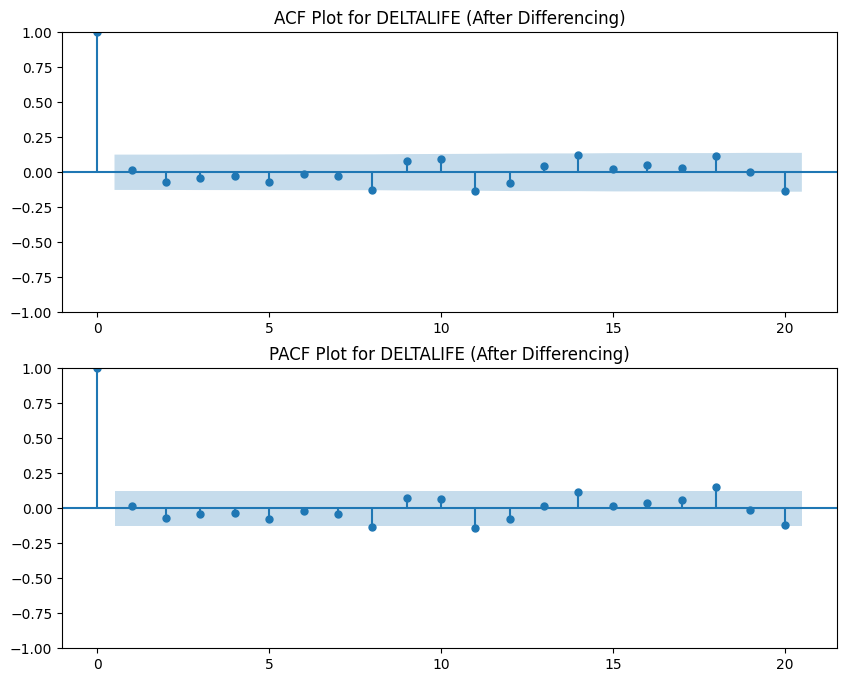

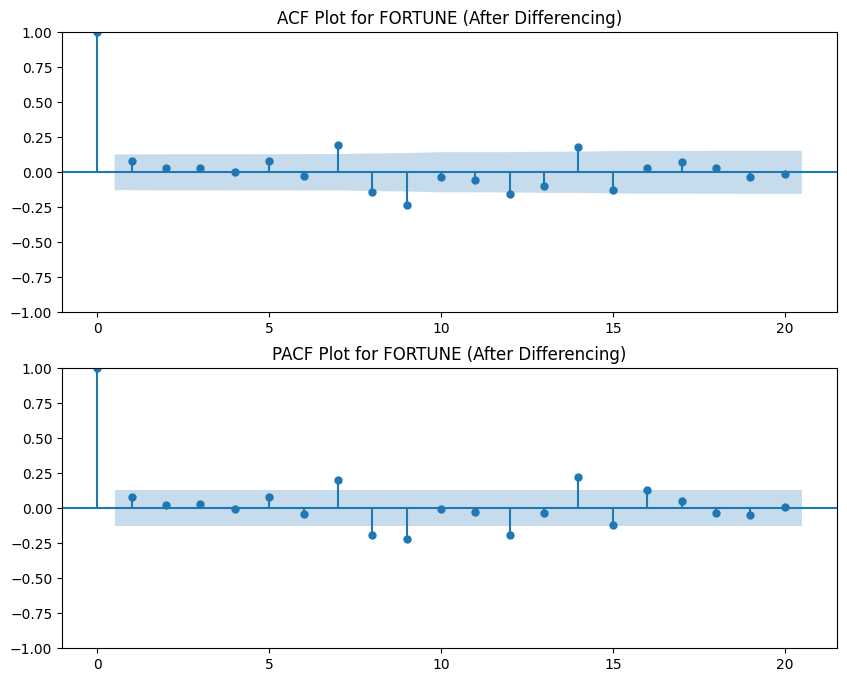

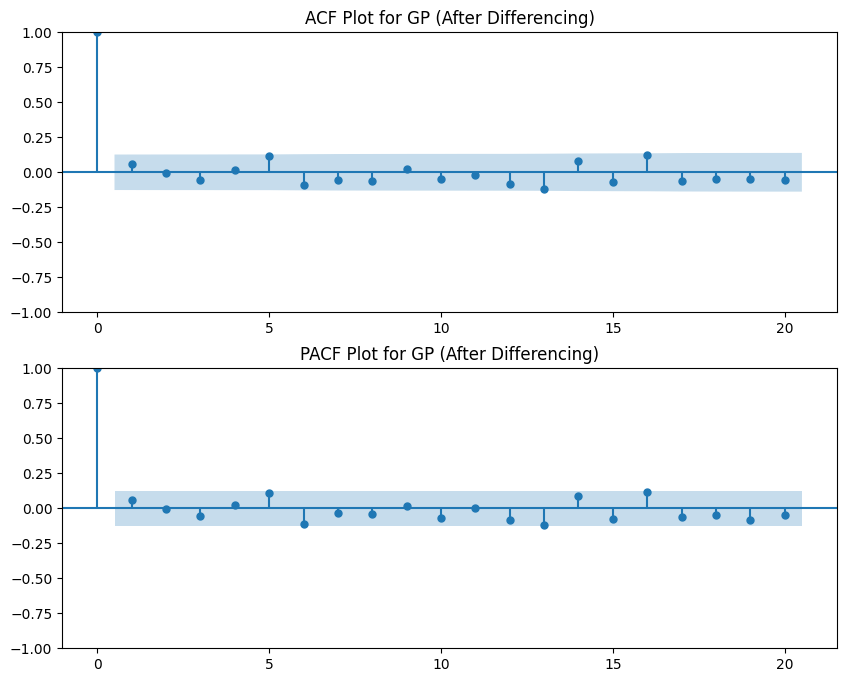

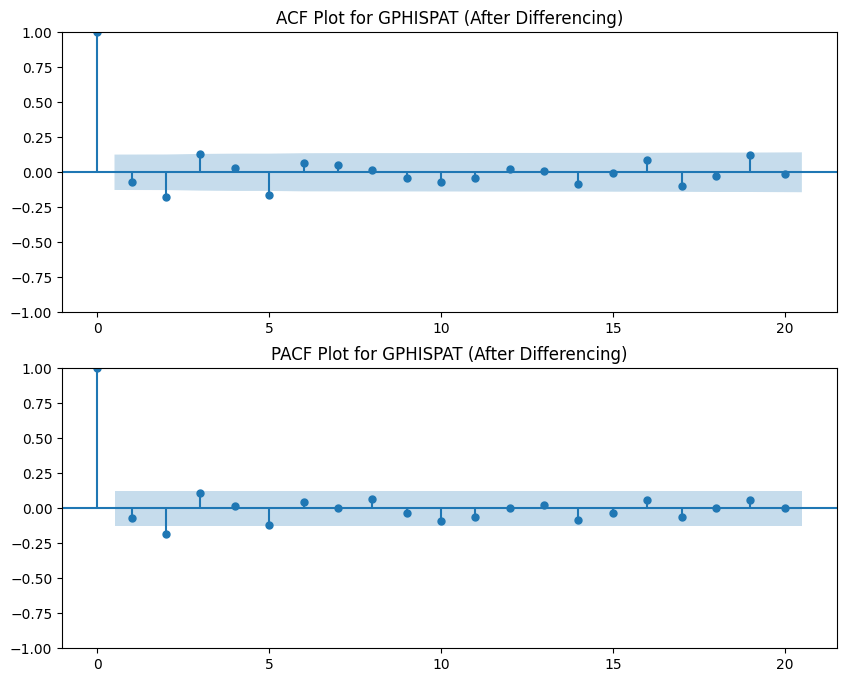

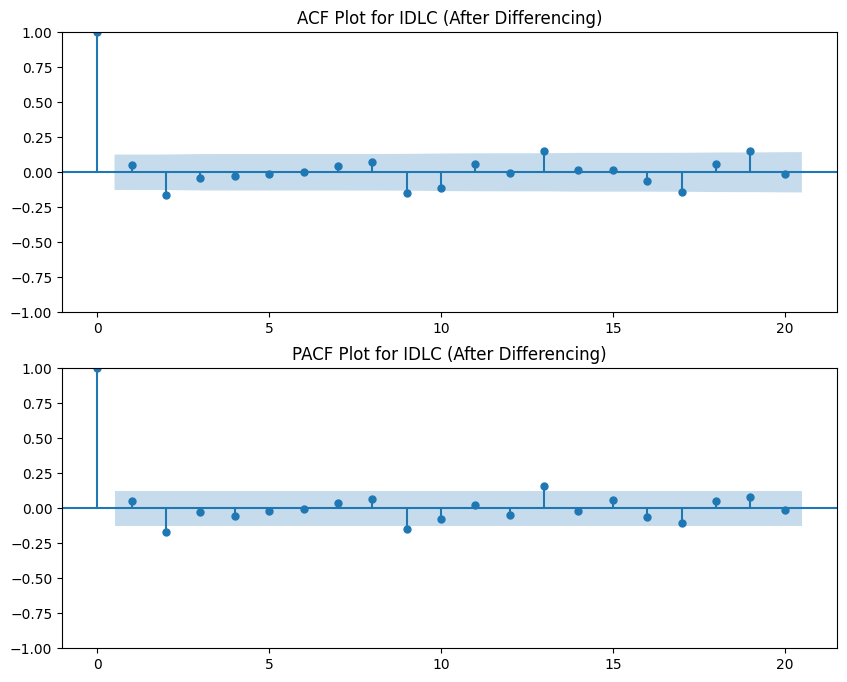

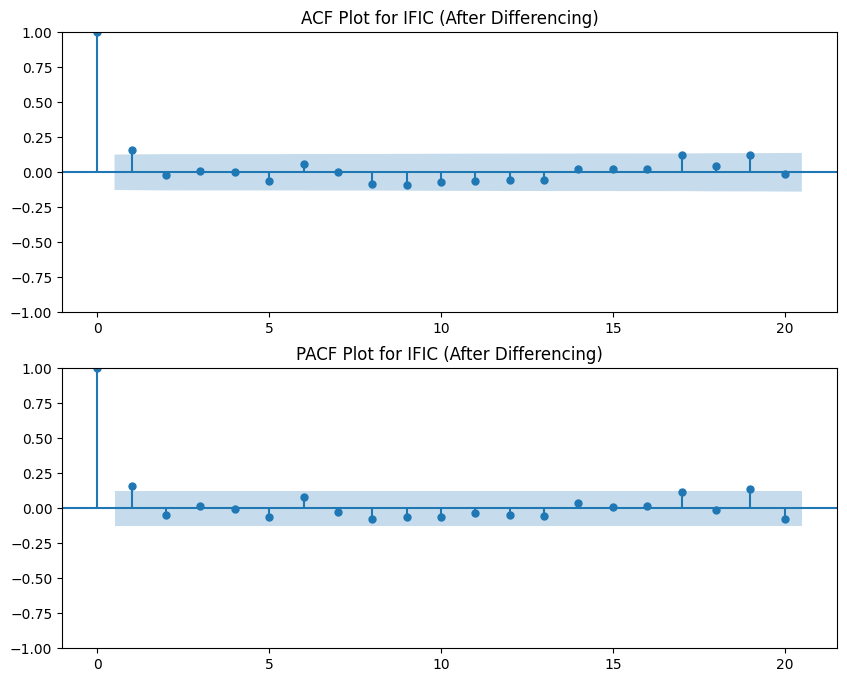

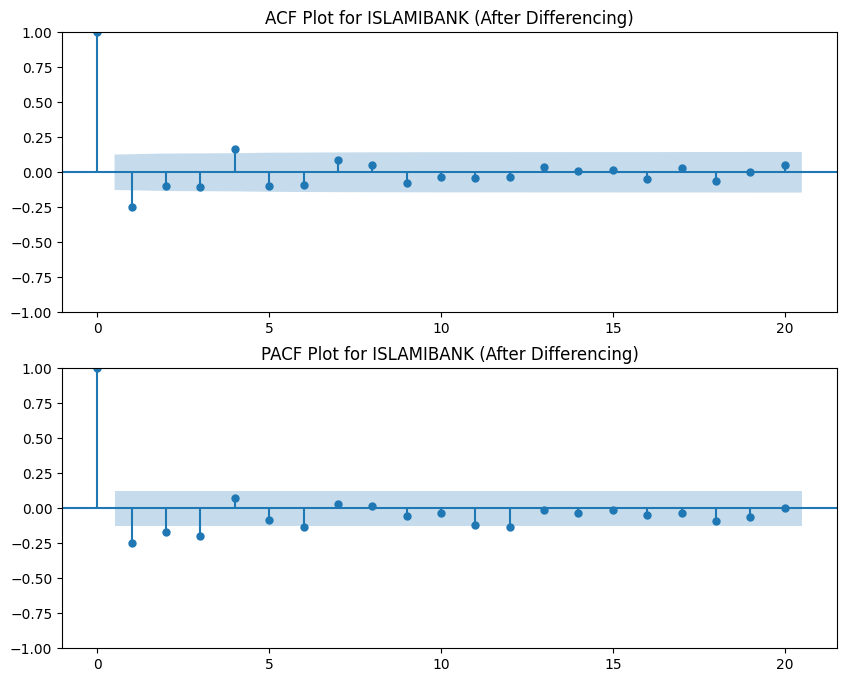

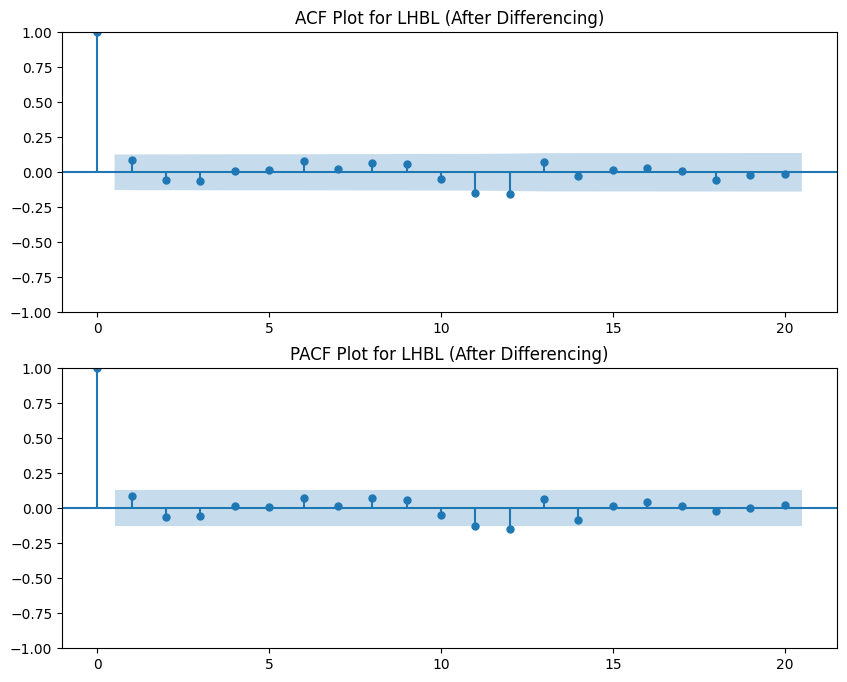

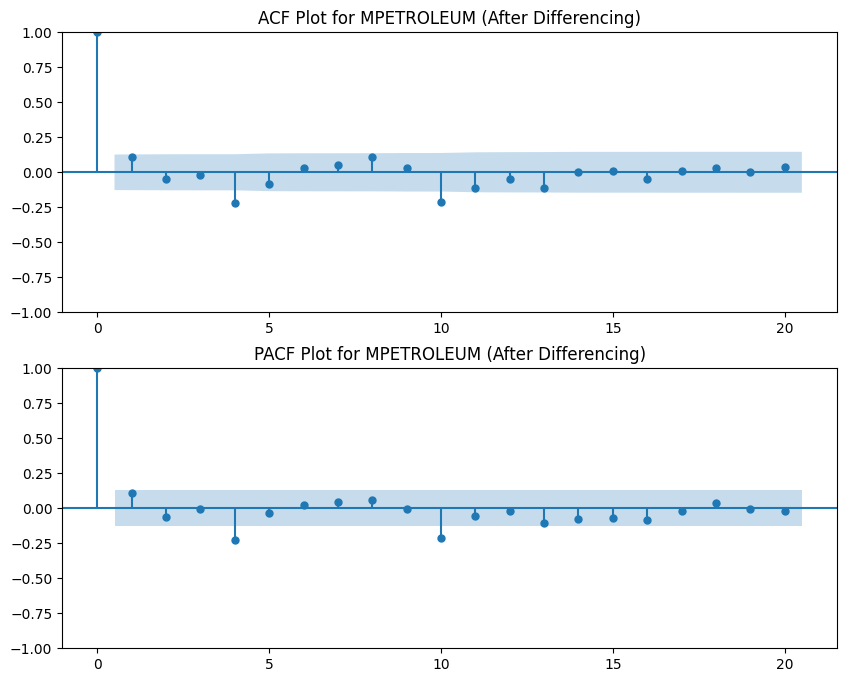

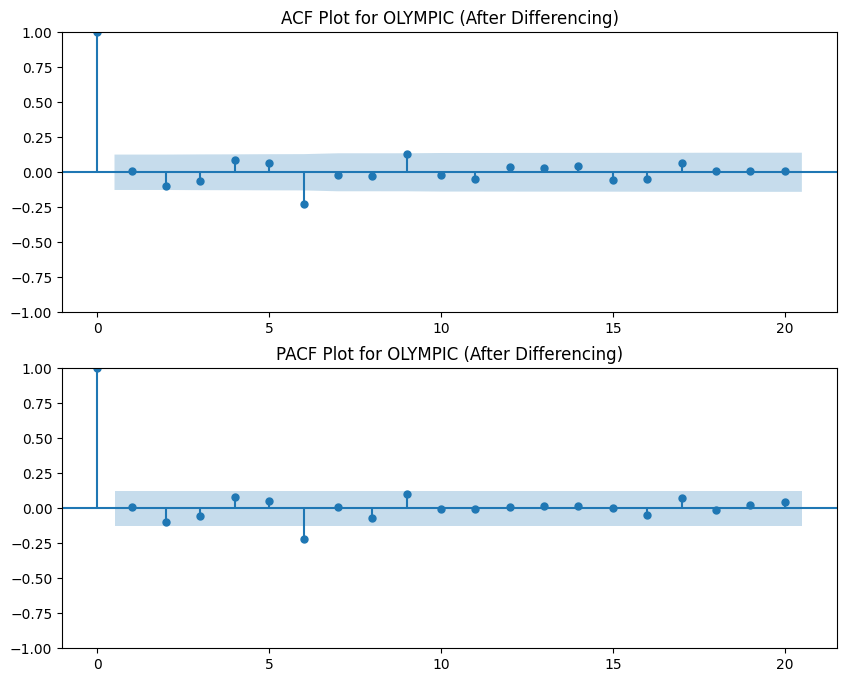

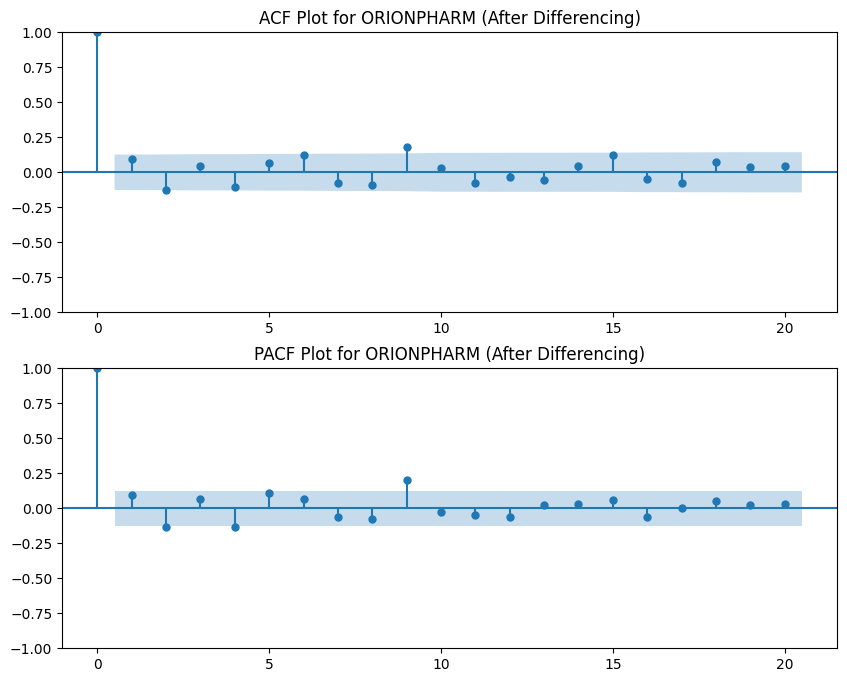

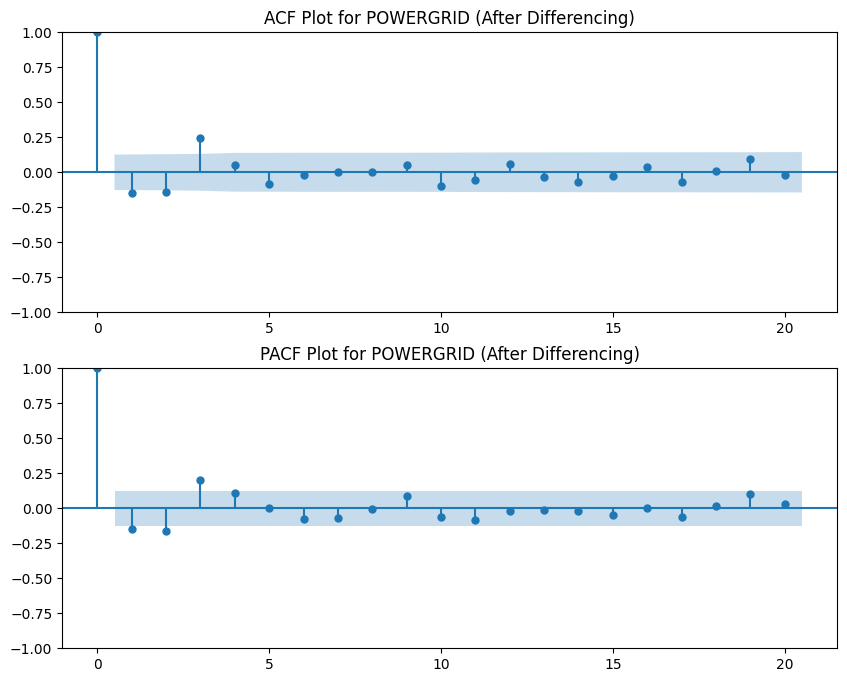

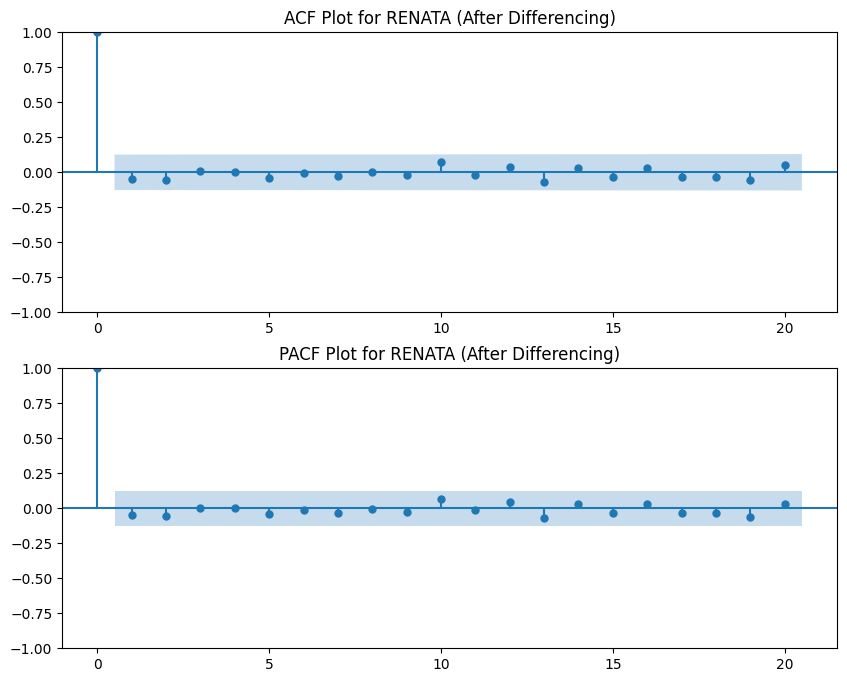

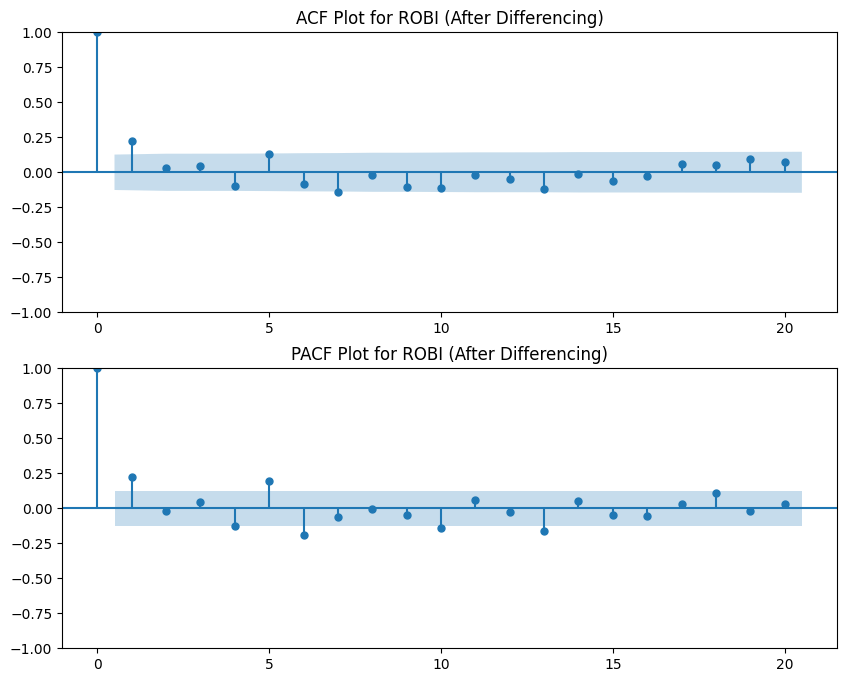

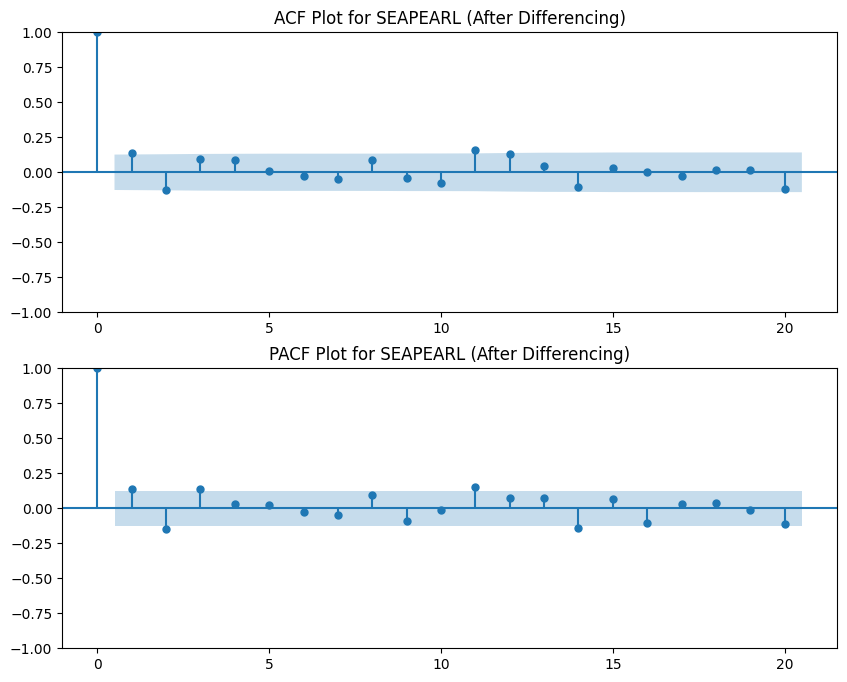

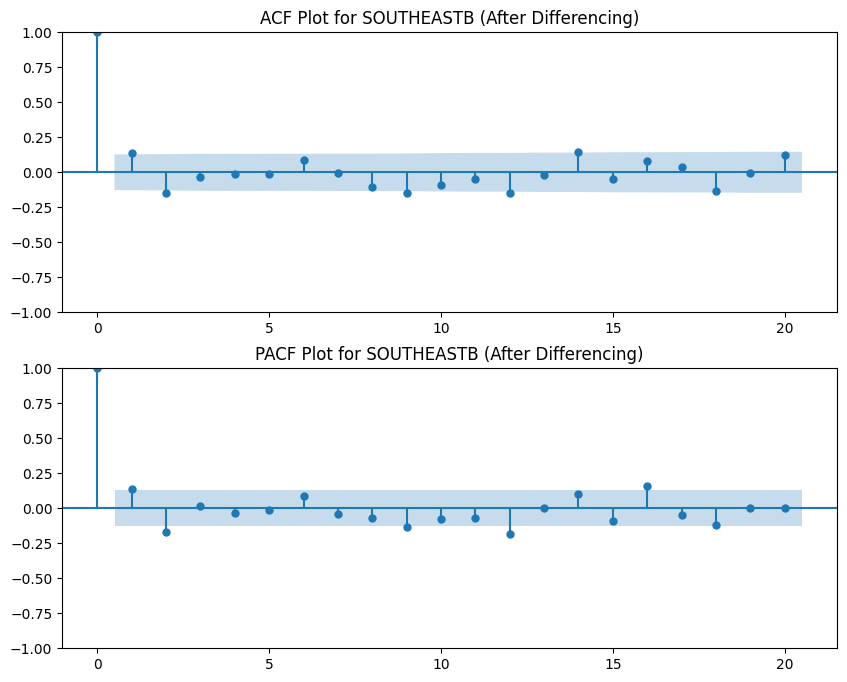

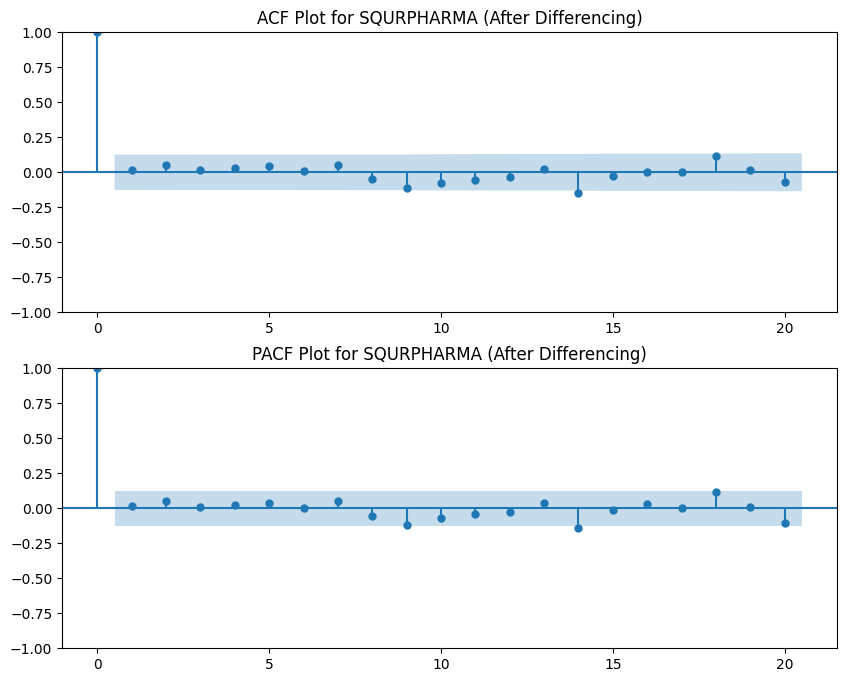

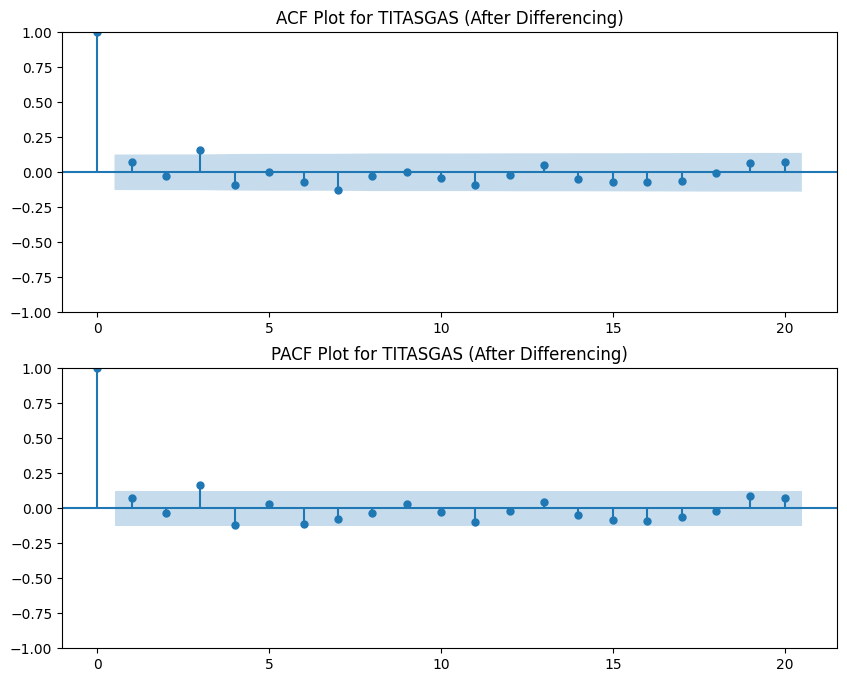

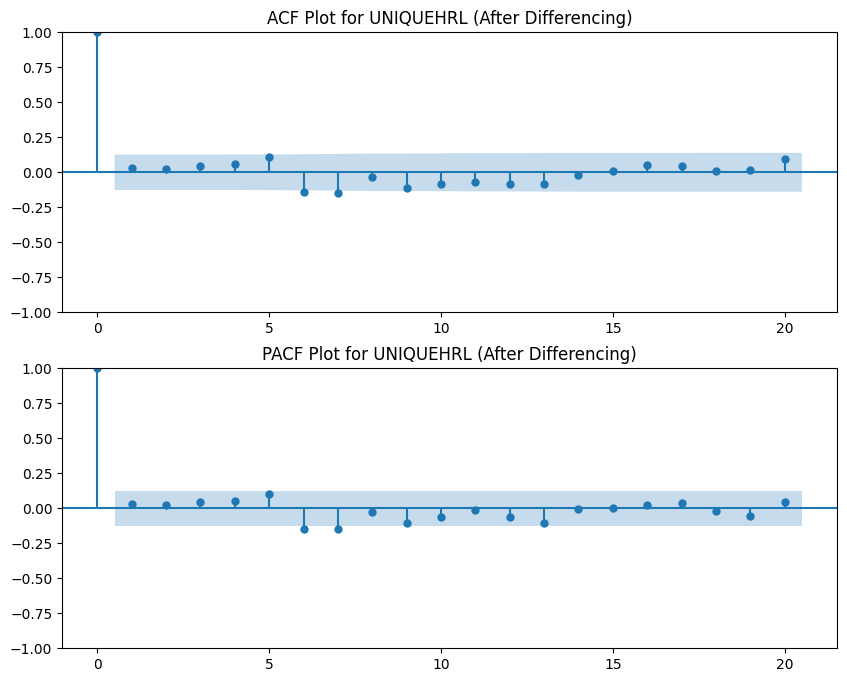

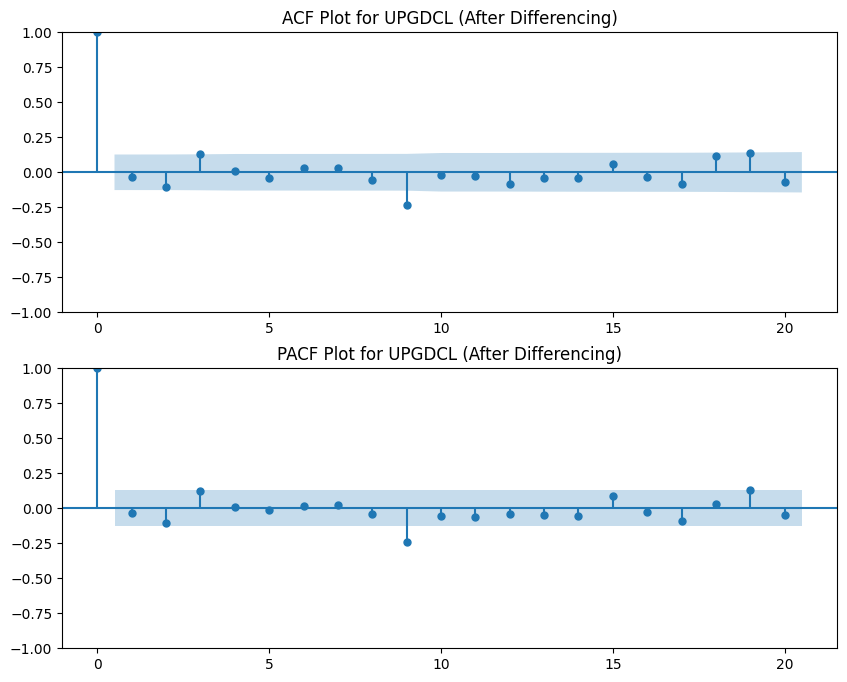

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming hose_df_2022 is already loaded

# Get the unique tickers
tickers = dse_df_2022['ticker'].unique()

# Loop through each ticker
for ticker in tickers:
    # Extract the 'close' price series for the current ticker
    ticker_data = dse_df_2022[dse_df_2022['ticker'] == ticker]['close']
    
    # Difference the time series
    differenced_data = ticker_data.diff().dropna()
    
    # Plot ACF and PACF for the differenced series
    fig, ax = plt.subplots(2, 1, figsize=(10, 8))
    plot_acf(differenced_data, ax=ax[0], lags=20, title=f'ACF Plot for {ticker} (After Differencing)')
    plot_pacf(differenced_data, ax=ax[1], lags=20, title=f'PACF Plot for {ticker} (After Differencing)')
    plt.show()